In [1]:
%%bash
ls

embedding.ipynb
mdem_protocol
output
refined1_0001_INPUT_0002_ignorechain.pdb
refined1_0001_INPUT_0007_ignorechain.pdb


In [2]:
%%bash
mkdir output
mkdir output/refined1_0001_INPUT_0002_ignorechain
mkdir output/refined1_0001_INPUT_0007_ignorechain

mkdir: cannot create directory `output': File exists
mkdir: cannot create directory `output/refined1_0001_INPUT_0002_ignorechain': File exists
mkdir: cannot create directory `output/refined1_0001_INPUT_0007_ignorechain': File exists


In [10]:
%%bash
protein_pdb=refined1_0001_INPUT_0002_ignorechain.pdb
protein=$(basename ${protein_pdb%.pdb})

outfolder=output/refined1_0001_INPUT_0002_ignorechain
mkdir ${outfolder}/bilayer
mkdir ${outfolder}/complex
mkdir ${outfolder}/complex/jobf

cp -r mdem_protocol/templates/embedding/* ${outfolder}/complex/
cp $protein_pdb $outfolder

mkdir: cannot create directory `output/refined1_0001_INPUT_0002_ignorechain/bilayer': File exists
mkdir: cannot create directory `output/refined1_0001_INPUT_0002_ignorechain/complex': File exists
mkdir: cannot create directory `output/refined1_0001_INPUT_0002_ignorechain/complex/jobf': File exists


In [13]:
!ls output/refined1_0001_INPUT_0002_ignorechain/complex

ffoplsaa_berger.itp	ffoplsaanb_berger.itp  jobf  mdpf
ffoplsaabon_berger.itp	for_embedding.top      mdf   popc_oplsaa_berger_fix.itp


In [ ]:
%%bash
outfolder=output/refined1_0001_INPUT_0002_ignorechain
protein_pdb=refined1_0001_INPUT_0002_ignorechain.pdb
protein=$(basename ${protein_pdb%.pdb})


In [18]:
%%bash
ln -s /home/ba13026/mpmodeling/analysis/insert2db_interactions.py ./insert2db_interactions.py
ln -s /home/ba13026/mpmodeling/analysis/analyse_HOLE.py ./analyse_HOLE.py
ln -s /home/ba13026/mpmodeling/analysis/setup_db_interactions.py ./setup_db_interactions.py

In [20]:
from insert2db_interactions import get_OH_atoms
from insert2db_interactions import get_KIHs
from insert2db_interactions import interaction_direction

In [21]:
import json 

Then, identified `HIS` type for docked PDB

```bash
bash ~/mpmodeling/find_histype.sh refined1_0001_INPUT_0002_ignorechain.pdb  
```

Then, generated `.gro` file and topology and restrain files, passing `HIS` type.

```bash
gmx_mpi pdb2gmx -f output/refined1_0001_INPUT_0002_ignorechain/refined1_0001_INPUT_0002_ignorechain.pdb -water none -ff oplsaa -o output/refined1_0001_INPUT_0002_ignorechain/confout_pep.gro -p output/refined1_0001_INPUT_0002_ignorechain/topol.top -i output/refined1_0001_INPUT_0002_ignorechain/posre.itp -his
```

Comparison between original docked PDB and PDB generated from `.gro` file, after using `pdb2gmx`

In [27]:
pdb_path = "output/refined1_0001_INPUT_0002_ignorechain/refined1_0001_INPUT_0002_ignorechain.pdb"
# H-bonds data
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]

kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]

print(set(S_hbonds))
print(set(S_kihs))

{'["6", "HE1", "16", "OG1", -1]', '["21", "HD1", "22", "OD1", 0]', '["18", "HG1", "22", "OD2", -1]'}
{'["29", "21", "24", "25", "28", 1]', '["26", "17", "20", "21", "24", 1]', '["21", "22", "25", "26", "29", -1]', '["17", "19", "22", "23", "26", -1]', '["22", "14", "17", "18", "21", 1]', '["19", "10", "13", "14", "17", 1]', '["12", "1", "3", "4", "7", 1]'}


Used preparation script protocol; which includes histidine type identification

```bash
bash mdem_protocol/prepare_protein_com.sh refined1_0001_INPUT_0002_ignorechain.pdb output/refined1_0001_INPUT_0002_ignorechain
```

Then analysed H-bonds of output coordinate file

In [22]:
!bash ~/mpmodeling/protocols/sem/gro2pdb.sh output/refined1_0001_INPUT_0002_ignorechain/complex/confout_pep.gro

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [35]:
pdb_path = "output/refined1_0001_INPUT_0002_ignorechain/complex/confout_pep.pdb"
# H-bonds data
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]

kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]

print(set(S_hbonds))
print(set(S_kihs))

{'["6", "HE1", "16", "OG1", -1]', '["21", "HD1", "22", "OD1", 0]', '["18", "HG1", "22", "OD2", -1]'}
{'["29", "21", "24", "25", "28", 1]', '["26", "17", "20", "21", "24", 1]', '["21", "22", "25", "26", "29", -1]', '["17", "19", "22", "23", "26", -1]', '["22", "14", "17", "18", "21", 1]', '["19", "10", "13", "14", "17", 1]', '["12", "1", "3", "4", "7", 1]'}


**<span style="color:red">H-bonds are preserved after using `pdb2gmx`!</span>**

**CAVEAT**: PDBs are not capped. No `ACE`(acetyl) nor `NH2` (amide) groups at N/C-termini.

We use protonation states given to terminal residues by Rosetta


<img src="acetylation.jpg" height="500" width="500">

Embedded protein in POPC with usual protocol

```bash
 bash mdem_protocol/embed_protein.sh output/refined1_0001_INPUT_0002_ignorechain
```

Check whether embedding affects H-bonds 

```bash
bash ~/mpmodeling/protocols/sem/gro2pdb.sh output/refined1_0001_INPUT_0002_ignorechain/complex/confout.gro
```


In [36]:
pdb_path = "output/refined1_0001_INPUT_0002_ignorechain/complex/confout.pdb"
# H-bonds data
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]

kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]

print(set(S_hbonds))
print(set(S_kihs))

{'["6", "HE1", "16", "OG1", -1]', '["21", "HD1", "22", "OD1", 0]', '["18", "HG1", "22", "OD2", -1]'}
{'["29", "21", "24", "25", "28", 1]', '["26", "17", "20", "21", "24", 1]', '["21", "22", "25", "26", "29", -1]', '["17", "19", "22", "23", "26", -1]', '["22", "14", "17", "18", "21", 1]', '["19", "10", "13", "14", "17", 1]', '["12", "1", "3", "4", "7", 1]'}


After embedding, resolvated complex using SOLVATE protocol; plus removing waters within bilayer and from protein/lipids interface.

```bash
path=output/refined1_0001_INPUT_0002_ignorechain/complex
# Make essential directories
mkdir ${path}/sem
mkdir ${path}/sem/em

# Copy essential files
cp -r ~/mpmodeling/protocols/sem/mdpf ${path}/sem/
cp ~/mpmodeling/protocols/sem/topol_POPC.itp ${path}/sem/
cp ${path}/*.itp ${path}/sem/
cp ${path}/confout.gro ${path}/sem/
mv ${path}/for_embedding.top ${path}/topol.top
cp ${path}/topol.top ${path}/sem/

# Fix general topology file and generate restrain files
sed -i 's/popc_oplsaa_berger_fix.itp/topol_POPC.itp/g' ${path}/sem/topol.top
bash ~/mpmodeling/protocols/sem/gen_posres.sh ${path}/sem

# Run resolvation
bash ~/mpmodeling/protocols/resolvate_SOLVATE.sh ${path}/sem

# Run sEM
bash ~/mpmodeling/protocols/sem/sem_extended.sh ${path}/sem
```

**Get RDF for SOL-SOL molecules for different files:**

```bash
gmx_mpi grompp -f fake.mdp -p temp_topol.top -c protein+lipids+sol_clean.pdb -o protein+lipids+sol_clean.tpr

gmx_mpi rdf -f protein+lipids+sol_clean.pdb -s protein+lipids+sol_clean.tpr -o rdf_protein+lipids+sol_clean.xvg
```

```bash
gmx_mpi grompp -f fake.mdp -p temp_protein_chains+lipids+sol_layer_altered.top -c protein_chains+lipids+sol_layer_altered.pdb -o protein_chains+lipids+sol_layer_altered.tpr


```

<h1 style="text-align:center">  Identification of clashes </h1>

In [117]:
import numpy
import re
import isambard_dev
import matplotlib.pyplot as plt
%matplotlib notebook

Main issues to be fixed:

* Clashes between water atoms due to PBCs

* Clashes between water atoms and lipid atoms. 
    See results from *rdf* for SOLVATE and ice-water based solvated systems.

In [41]:
def filter_xvg(f_path):
    lines = [l.rstrip() for l in open(f_path,'r').readlines() if not("@" in l) if not("#" in l)]
    lines = numpy.array([l.split() for l in lines]).T
    return lines

Used *rdf* to find the mean pair-wise distance between atoms from different groups with respect to water molecules

```bash
touch fake.mdp # This generates an empty .mdp file

gmx_mpi grompp -f fake.mdp -p topol.top -c confout.gro -o confout.tpr
gmx_mpi grompp -f sem/fake.mdp -p sem/topol.top -c sem/ionise.gro -o sem/ionise.tpr

# Computed RDFs for different groups of atoms in PDB
gmx_mpi rdf -f confout.gro -s confout.tpr -o rdf_confout.xvg
gmx_mpi rdf -f sem/ionise.gro -s sem/ionise.tpr -o sem/rdf_ionise.xvg
# Selected SOL SOL

gmx_mpi rdf -f confout.gro -s confout.tpr -o rdf_POPC_SOL.xvg
gmx_mpi rdf -f sem/ionise.gro -s sem/ionise.tpr -o sem/rdf_sem_POPC_SOL.xvg
# Selected POPC SOL

gmx_mpi rdf -f confout.gro -s confout.tpr -o rdf_Protein_SOL.xvg
gmx_mpi rdf -f sem/ionise.gro -s sem/ionise.tpr -o sem/rdf_sem_Protein_SOL.xvg
# Selected Protein SOL
```

Then, ploted obtained *rdf*

<IPython.core.display.Javascript object>


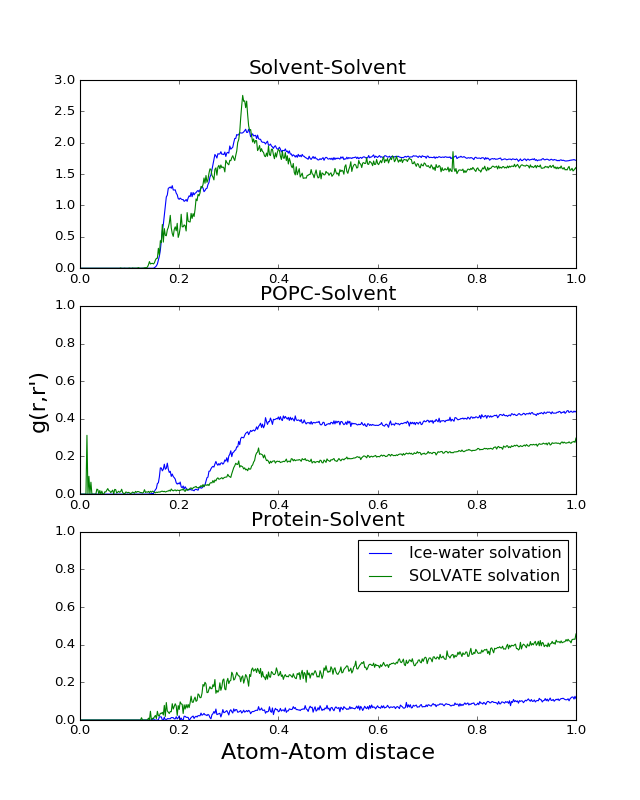

In [76]:
rad_SOL_SOL,rdf_SOL_SOL=filter_xvg("output/refined1_0001_INPUT_0002_ignorechain/complex/rdf_confout.xvg")
rad_POPC_SOL,rdf_POPC_SOL=filter_xvg("output/refined1_0001_INPUT_0002_ignorechain/complex/rdf_POPC_SOL.xvg")
rad_Protein_SOL,rdf_Protein_SOL=filter_xvg("output/refined1_0001_INPUT_0002_ignorechain/complex/rdf_Protein_SOL.xvg")

sem_rad_SOL_SOL,sem_rdf_SOL_SOL=filter_xvg(
        "output/refined1_0001_INPUT_0002_ignorechain/complex/sem/rdf_ionise.xvg")
sem_rad_POPC_SOL,sem_rdf_POPC_SOL=filter_xvg(
        "output/refined1_0001_INPUT_0002_ignorechain/complex/sem/rdf_sem_POPC_SOL.xvg")
sem_rad_Protein_SOL,sem_rdf_Protein_SOL=filter_xvg(
        "output/refined1_0001_INPUT_0002_ignorechain/complex/sem/rdf_sem_Protein_SOL.xvg")

fig, ax = plt.subplots(3,1,figsize=(8,10))

ax[0].plot(rad_SOL_SOL, rdf_SOL_SOL,label="Ice-water solvation")
ax[0].plot(sem_rad_SOL_SOL,sem_rdf_SOL_SOL,label="SOLVATE solvation")
ax[0].set_title("Solvent-Solvent",fontsize=18)
ax[0].set_xlim(0,1)

ax[1].plot(rad_POPC_SOL, rdf_POPC_SOL,label="Ice-water solvation")
ax[1].plot(sem_rad_POPC_SOL,sem_rdf_POPC_SOL,label="SOLVATE solvation")
ax[1].set_title("POPC-Solvent",fontsize=18)
ax[1].set_xlim(0,1)
ax[1].set_ylabel("g(r,r')",fontsize=20)

ax[2].plot(rad_Protein_SOL,rdf_Protein_SOL,label="Ice-water solvation")
ax[2].plot(sem_rad_Protein_SOL,sem_rdf_Protein_SOL,label="SOLVATE solvation")
ax[2].set_title("Protein-Solvent",fontsize=18)
ax[2].set_xlim(0,1)
ax[2].set_xlabel("Atom-Atom distace",fontsize=20)

plt.legend()
plt.show()

**CONCLUSION**: `SOLVATE` introduces clashes between lipid and added water molecules, in constrast to GROMACS `solvate` routine, based on ice-water.

In [77]:
in_file="output/refined1_0001_INPUT_0002_ignorechain/complex/sem/protein+lipids+sol_RAW.pdb"
ifile   = open(in_file, 'r')
lines   = ifile.readlines()
ifile.close()

In [85]:
POPC_z = [float(l.split()[7]) for l in lines if re.search(r"POPC", l)]
P8_z = [float(l.split()[7]) for l in lines if re.search(r"P8", l)]

In [88]:
POPC_z = numpy.asarray(POPC_z)
print("Min/Max z-coordinate POPC atoms [Angstroms]")
print(POPC_z.min(), POPC_z.max())

P8_z_mean  = numpy.mean(P8_z)
P8_z_Upper = [z for z in P8_z if z>P8_z_mean]
P8_z_Upper_mean  = numpy.mean(P8_z_Upper)
P8_z_Lower = [z for z in P8_z if z<P8_z_mean]
P8_z_Lower_mean  = numpy.mean(P8_z_Lower)
print("Average z-coordinate P8-POPC atoms, Lower/Upper leaflet [Angstroms]")
print(P8_z_Lower_mean, P8_z_Upper_mean)

Min/Max z-coordinate POPC atoms [Angstroms]
20.743 79.133
Average z-coordinate P8-POPC atoms, Lower/Upper leaflet [Angstroms]
29.613952381 70.9873253968


<h1 style="text-align:center"> sEM: Ice-water solvation </h1>

In [193]:
path="output/refined1_0001_INPUT_0002_ignorechain"

In [187]:
sem_stages = [
"PR-POPC_SC+BB_Protein_Cbonds",
"PR-SC+BB_Protein_Cbonds",
"PR-BB_Protein_Cbonds",
"No-PR_Cbonds",
"No-PR_Ubonds"
]

energy_files = ["/complex/em/energy_sem_"+name+".xvg" for name in sem_stages]

In [188]:
colors = ['blue','red','green','magenta','black']
labels = ['EM: rough','EM1: C-bonds, No-R','EM2: U-bonds, No-R']+["sEM: stage "+str(i+1) for i in range(5)]

<IPython.core.display.Javascript object>


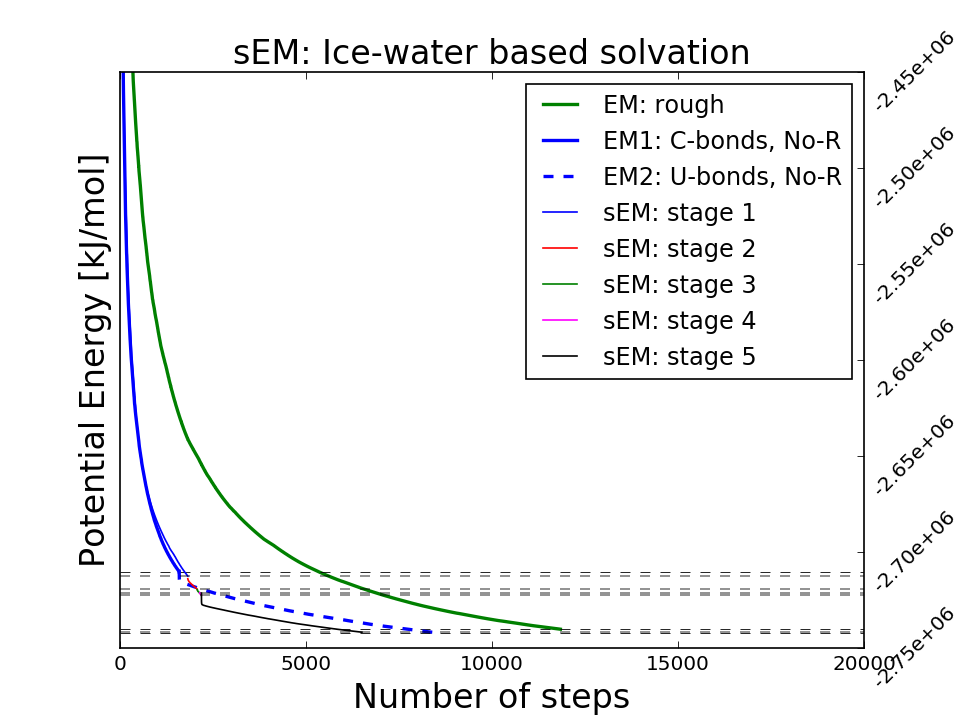

In [190]:
fig_sem, ax = plt.subplots(dpi=120)

################################ % COMPARISON % #################################
################################ % Rough EM: unconstrained bonds, unrestrained groups
f_path = path+"/complex/em/energy_em_No-PR_Ubonds.xvg"
try:
    lines = filter_xvg(f_path)
    stepn = [float(l) for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn[50:], energy[50:], color="green",linewidth=2,label="EM: rough")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )    
except:
    print("No file: energy_em_No-PR_Ubonds.xvg")
################################# % EM: constrained bonds, unrestrained groups (PART 1)
f_path = path+"/complex/em/energy_em_No-PR_Cbonds.xvg" # constrained bonds
try:
    lines = filter_xvg(f_path)
    stepn = [float(l) for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn[50:], energy[50:], color="blue", linewidth=2, label="EM1: C-bonds, No-R")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )

    previous = stepn[-1]
except:
    print("No file: energy_em_No-PR_Cbonds.xvg")
################################ % EM: unconstrained bonds, unrestrained groups (PART 2)
f_path = path+"/complex/em/energy_em_No-PR_Ubonds_After_Cbonds.xvg" 
try:
    lines = filter_xvg(f_path)
    stepn = [float(l)+previous for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn, energy, color="blue", linewidth=2, linestyle="--",label="EM2: U-bonds, No-R")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )
except:
    print("No file: energy_em_No-PR_Ubonds_After_Cbonds.xvg")
################################# % Smooth Energy Minimization %
c_stepn = 0 # Counter 
for i in range(len(energy_files)):
    f_path = path+energy_files[i]
    try: 
        lines = filter_xvg(f_path)
        # save data
        stepn = [float(l)+c_stepn for l in lines[0]] 
        energy = [float(l) for l in lines[1]]
        c_stepn = stepn[-1]
        if i == 0 :
            ax.plot(stepn[30:], energy[30:], color=colors[i], label="sEM: stage "+str(i+1))
            ax.plot((0,20000),(energy[-1],energy[-1]),linestyle="--",color="black",alpha=0.5)
        else:
            ax.plot(stepn,energy, color=colors[i], label="sEM: stage "+str(i+1))
            ax.plot((0,20000),(energy[-1],energy[-1]),linestyle="--",color="black",alpha=0.5)
    except:
        print("No File :(")
################################# % Customize plot % 
ax.set_title("sEM: Ice-water based solvation", fontsize=20)

ax.set_xlabel("Number of steps", fontsize=20)
ax.set_ylabel("Potential Energy [kJ/mol]", fontsize=20)
# ax.yaxis.set_label_position("right")

# ax.set_xlim(0,20000)
# ax.set_ylim(-2.77*1e6,-2.1*1e6)

ax.set_xlim(0,20000)
ax.set_ylim(-2.75*1e6,-2.45*1e6)

y_labels = ax.get_yticks()
ax.set_yticklabels(['%.2e' % y for y in y_labels], rotation=45)
ax.yaxis.tick_right()
#################################
plt.legend()
plt.show()

## Water displacement during sEM stages

In [178]:
for stage in sem_stages:
    file = path+"/complex/em/"+"sem_"+stage+".gro"
    !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $file

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [252]:
for grof in ['ionise','em/em_No-PR_Ubonds','em/em_No-PR_Cbonds','em/em_No-PR_Ubonds_After_Cbonds']:
    file = path+"/complex/"+grof+".gro"
    !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $file

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [204]:
data_all_stages = {}
# for i in range(len(sem_stages)):
for i in [0]:
    # Open .gro coordinate file
    in_file = path+"/complex/em/sem_"+ sem_stages[i]+'.gro'
    ifile   = open(in_file, 'r')
    lines   = ifile.readlines()
    ifile.close()
    
    # Extract Lipid Phosphate (P8) atomic coordinates: Z-axis
    P8_z = [float(l.split()[-1]) for l in lines if re.search(r"P8", l)]
    P8_z_mean  = numpy.mean(P8_z)
    # Average Z-axis postions, upper leaflet
    P8_z_Upper = [z for z in P8_z if z>P8_z_mean]
    P8_z_Upper_mean  = 10*numpy.mean(P8_z_Upper)
    # Average Z-axis postions, lower leaflet
    P8_z_Lower = [z for z in P8_z if z<P8_z_mean]
    P8_z_Lower_mean  = 10*numpy.mean(P8_z_Lower)
    print("Lipid P8 atoms Lower/Upper leaflet [Angstroms]: ",P8_z_Lower_mean,P8_z_Upper_mean)
    del P8_z    
    
    # Get SOL lines
    SOL = [l for l in lines if re.search(r'SOL', l)]
    
    # Load PDB as AMPAL object
    protein_path = path+"/complex/em/sem_"+ sem_stages[i]+'.pdb'
    protein = isambard_dev.ampal.convert_pdb_to_ampal(protein_path)
    
    # Find chain primitives and center of mass or protein alone
    ampal = protein
    prims = numpy.array([x.coordinates for x in ampal.primitives])
    ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(numpy.mean(prims, axis=0))
    protein_com = numpy.array(protein.centre_of_mass)
    print("Protein COM [Angstroms]: ",protein_com)
    
    # Get Oxygen SOL simplified data for visualization
    SOL_data = SOL
    N = len(SOL_data)
    r_xy_SOL_box = []
    for i in range(0,N,3):
            x,y,z = list(map(float,SOL_data[i].split()[-3:]))
            if (z*10 >= P8_z_Lower_mean) and (z*10 <= P8_z_Upper_mean):
                r_xy = numpy.linalg.norm(10*numpy.array([x,y]) - protein_com[:2])
                r_xy_SOL_box.append([10*z, r_xy])

Lipid P8 atoms Lower/Upper leaflet [Angstroms]:  29.2977777778 70.9613492063
Protein COM [Angstroms]:  [ 62.47910508  63.15475668  50.09764918]


<IPython.core.display.Javascript object>


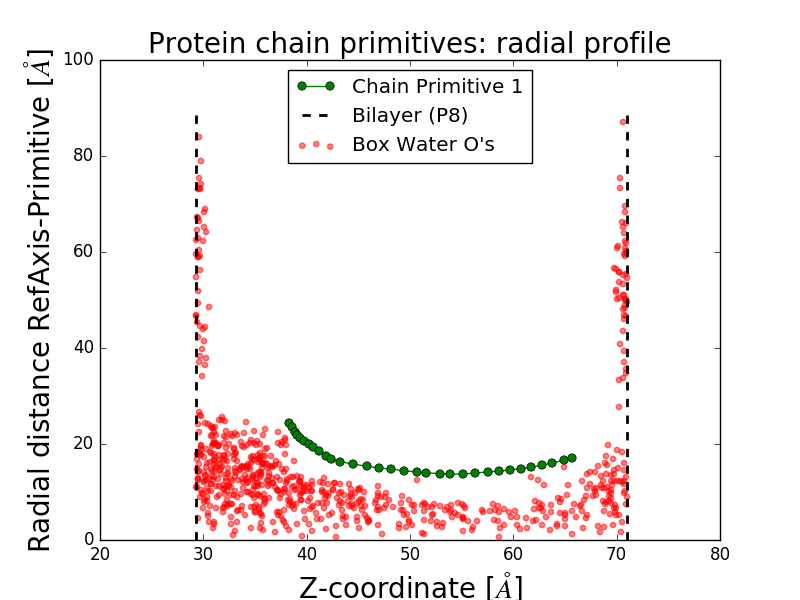

In [213]:
fig_SOL = plt.figure(dpi=100)

for i in range(1):
    dist = prims[i] - ref_axis.coordinates
    x = numpy.array(ref_axis.coordinates).T[2]
    y = numpy.linalg.norm(dist, axis=1)
    plt.plot(x,y,marker = 'o', label="Chain Primitive "+str(i+1),color='green')

X,Y = numpy.array(r_xy_SOL_box).T
plt.scatter(X,Y, marker="o", color="red", s=15, label="Box Water O's", alpha=0.5)

plt.plot((P8_z_Lower_mean, P8_z_Lower_mean),(0,90),linestyle="--",color="black",linewidth=2, label="Bilayer (P8)")
plt.plot((P8_z_Upper_mean, P8_z_Upper_mean),(0,90),linestyle="--",color="black",linewidth=2)

plt.title("Protein chain primitives: radial profile",fontsize=20)
plt.xlabel("Z-coordinate [$\AA$]", fontsize=20)
plt.ylabel("Radial distance RefAxis-Primitive [$\AA$]",fontsize=20)

plt.legend(loc="upper center")
# plt.axis('equal')
# plt.xlim(P8_z_Lower_mean-1,P8_z_Upper_mean+1)
plt.ylim(0,100)

plt.show()

<h2 style="text-align:center" >Repeat sEM, second docked structure (wide BB)</h2>

Ran protocols:

```bash
###########################################################################################
bash mdem_protocol/prepare_protein_com.sh refined1_0001_INPUT_0007_ignorechain.pdb output/refined1_0001_INPUT_0007_ignorechain

bash mdem_protocol/embed_protein.sh output/refined1_0001_INPUT_0007_ignorechain

bash mdem_protocol/resolvate2.sh output/refined1_0001_INPUT_0007_ignorechain/complex

###########################################################################################
path="output/refined1_0001_INPUT_0007_ignorechain/complex"

# Make essential directories
mkdir ${path}/em

# Copy essential files
cp -r ~/mpmodeling/protocols/sem/mdpf/* ${path}/mdpf/
cp ~/mpmodeling/protocols/sem/topol_POPC.itp ${path}/

# Fix general topology file and generate restrain files
sed -i 's/popc_oplsaa_berger_fix.itp/topol_POPC.itp/g' ${path}/topol.top
bash ~/mpmodeling/protocols/sem/gen_posres.sh ${path}

# Run sEM
bash ~/mpmodeling/protocols/sem/sem_extended.sh ${path}
```

In [214]:
path="output/refined1_0001_INPUT_0007_ignorechain"

<IPython.core.display.Javascript object>


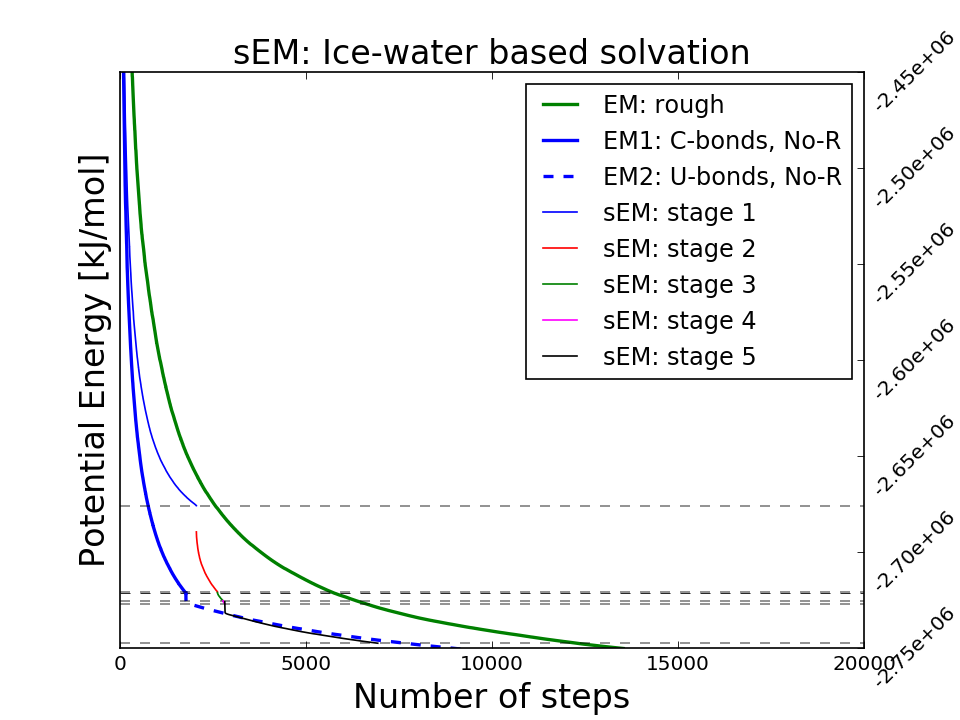

In [215]:
fig_sem2, ax = plt.subplots(dpi=120)

################################ % COMPARISON % #################################
################################ % Rough EM: unconstrained bonds, unrestrained groups
f_path = path+"/complex/em/energy_em_No-PR_Ubonds.xvg"
try:
    lines = filter_xvg(f_path)
    stepn = [float(l) for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn[50:], energy[50:], color="green",linewidth=2,label="EM: rough")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )    
except:
    print("No file: energy_em_No-PR_Ubonds.xvg")
################################# % EM: constrained bonds, unrestrained groups (PART 1)
f_path = path+"/complex/em/energy_em_No-PR_Cbonds.xvg" # constrained bonds
try:
    lines = filter_xvg(f_path)
    stepn = [float(l) for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn[50:], energy[50:], color="blue", linewidth=2, label="EM1: C-bonds, No-R")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )

    previous = stepn[-1]
except:
    print("No file: energy_em_No-PR_Cbonds.xvg")
################################ % EM: unconstrained bonds, unrestrained groups (PART 2)
f_path = path+"/complex/em/energy_em_No-PR_Ubonds_After_Cbonds.xvg" 
try:
    lines = filter_xvg(f_path)
    stepn = [float(l)+previous for l in lines[0]]
    energy = [float(l) for l in lines[1]]

    ax.plot(stepn, energy, color="blue", linewidth=2, linestyle="--",label="EM2: U-bonds, No-R")
    ax.plot((0,20000), (energy[-1],energy[-1]), color="black", linewidth=0.5, linestyle="--" )
except:
    print("No file: energy_em_No-PR_Ubonds_After_Cbonds.xvg")
################################# % Smooth Energy Minimization %
c_stepn = 0 # Counter 
for i in range(len(energy_files)):
    f_path = path+energy_files[i]
    try: 
        lines = filter_xvg(f_path)
        # save data
        stepn = [float(l)+c_stepn for l in lines[0]] 
        energy = [float(l) for l in lines[1]]
        c_stepn = stepn[-1]
        if i == 0 :
            ax.plot(stepn[30:], energy[30:], color=colors[i], label="sEM: stage "+str(i+1))
            ax.plot((0,20000),(energy[-1],energy[-1]),linestyle="--",color="black",alpha=0.5)
        else:
            ax.plot(stepn,energy, color=colors[i], label="sEM: stage "+str(i+1))
            ax.plot((0,20000),(energy[-1],energy[-1]),linestyle="--",color="black",alpha=0.5)
    except:
        print("No File :(")
################################# % Customize plot % 
ax.set_title("sEM: Ice-water based solvation", fontsize=20)

ax.set_xlabel("Number of steps", fontsize=20)
ax.set_ylabel("Potential Energy [kJ/mol]", fontsize=20)
# ax.yaxis.set_label_position("right")

# ax.set_xlim(0,20000)
# ax.set_ylim(-2.77*1e6,-2.1*1e6)

ax.set_xlim(0,20000)
ax.set_ylim(-2.75*1e6,-2.45*1e6)

y_labels = ax.get_yticks()
ax.set_yticklabels(['%.2e' % y for y in y_labels], rotation=45)
ax.yaxis.tick_right()
#################################
plt.legend()
plt.show()

In [217]:
for stage in sem_stages:
    file = path+"/complex/em/"+"sem_"+stage+".gro"
    !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $file

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [218]:
data_all_stages = {}
# for i in range(len(sem_stages)):
for i in [0]:
    # Open .gro coordinate file
    in_file = path+"/complex/em/sem_"+ sem_stages[i]+'.gro'
    ifile   = open(in_file, 'r')
    lines   = ifile.readlines()
    ifile.close()
    
    # Extract Lipid Phosphate (P8) atomic coordinates: Z-axis
    P8_z = [float(l.split()[-1]) for l in lines if re.search(r"P8", l)]
    P8_z_mean  = numpy.mean(P8_z)
    # Average Z-axis postions, upper leaflet
    P8_z_Upper = [z for z in P8_z if z>P8_z_mean]
    P8_z_Upper_mean  = 10*numpy.mean(P8_z_Upper)
    # Average Z-axis postions, lower leaflet
    P8_z_Lower = [z for z in P8_z if z<P8_z_mean]
    P8_z_Lower_mean  = 10*numpy.mean(P8_z_Lower)
    print("Lipid P8 atoms Lower/Upper leaflet [Angstroms]: ",P8_z_Lower_mean,P8_z_Upper_mean)
    del P8_z    
    
    # Get SOL lines
    SOL = [l for l in lines if re.search(r'SOL', l)]
    
    # Load PDB as AMPAL object
    protein_path = path+"/complex/em/sem_"+ sem_stages[i]+'.pdb'
    protein = isambard_dev.ampal.convert_pdb_to_ampal(protein_path)
    
    # Find chain primitives and center of mass or protein alone
    ampal = protein
    prims = numpy.array([x.coordinates for x in ampal.primitives])
    ref_axis = isambard_dev.ampal.pseudo_atoms.Primitive.from_coordinates(numpy.mean(prims, axis=0))
    protein_com = numpy.array(protein.centre_of_mass)
    print("Protein COM [Angstroms]: ",protein_com)
    
    # Get Oxygen SOL simplified data for visualization
    SOL_data = SOL
    N = len(SOL_data)
    r_xy_SOL_box = []
    for i in range(0,N,3):
            x,y,z = list(map(float,SOL_data[i].split()[-3:]))
            if (z*10 >= P8_z_Lower_mean) and (z*10 <= P8_z_Upper_mean):
                r_xy = numpy.linalg.norm(10*numpy.array([x,y]) - protein_com[:2])
                r_xy_SOL_box.append([10*z, r_xy])

Lipid P8 atoms Lower/Upper leaflet [Angstroms]:  30.0520318725 71.5043824701
Protein COM [Angstroms]:  [ 62.54121299  63.46549126  50.7608365 ]


<IPython.core.display.Javascript object>


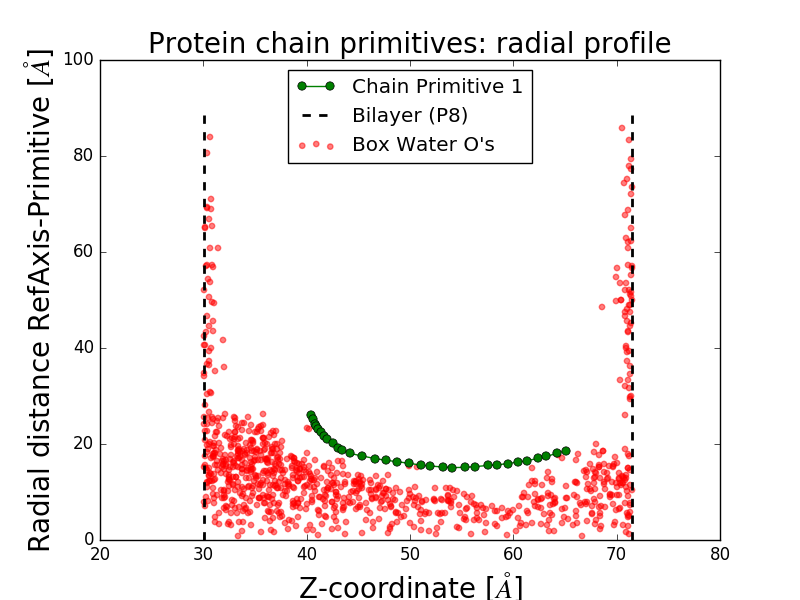

In [220]:
fig_SOL2 = plt.figure(dpi=100)

for i in range(1):
    dist = prims[i] - ref_axis.coordinates
    x = numpy.array(ref_axis.coordinates).T[2]
    y = numpy.linalg.norm(dist, axis=1)
    plt.plot(x,y,marker = 'o', label="Chain Primitive "+str(i+1),color='green')

X,Y = numpy.array(r_xy_SOL_box).T
plt.scatter(X,Y, marker="o", color="red", s=15, label="Box Water O's", alpha=0.5)

plt.plot((P8_z_Lower_mean, P8_z_Lower_mean),(0,90),linestyle="--",color="black",linewidth=2, label="Bilayer (P8)")
plt.plot((P8_z_Upper_mean, P8_z_Upper_mean),(0,90),linestyle="--",color="black",linewidth=2)

plt.title("Protein chain primitives: radial profile",fontsize=20)
plt.xlabel("Z-coordinate [$\AA$]", fontsize=20)
plt.ylabel("Radial distance RefAxis-Primitive [$\AA$]",fontsize=20)

plt.legend(loc="upper center")
# plt.axis('equal')
# plt.xlim(P8_z_Lower_mean-1,P8_z_Upper_mean+1)
plt.ylim(0,100)

plt.show()

**<h1 style="color:red">TO-DO: ANALYSE H-BONDS AND KIHS</h1>**

In [222]:
from insert2db_interactions import get_OH_atoms
from insert2db_interactions import get_KIHs
from insert2db_interactions import interaction_direction
import json

In [223]:
path="output/refined1_0001_INPUT_0002_ignorechain"

In [266]:
pdb_path = 'output/refined1_0001_INPUT_0002_ignorechain/refined1_0001_INPUT_0002_ignorechain.pdb'
# pdb_path = path+"/complex/em/sem_"+ sem_stages[0]+'.pdb'
# H-bonds data
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
# KIHs data
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]

print("Original docked model:")
print(set(S_hbonds))
print(set(S_kihs))

Original docked model:
{'["6", "HE1", "16", "OG1", -1]', '["21", "HD1", "22", "OD1", 0]', '["18", "HG1", "22", "OD2", -1]'}
{'["29", "21", "24", "25", "28", 1]', '["26", "17", "20", "21", "24", 1]', '["21", "22", "25", "26", "29", -1]', '["17", "19", "22", "23", "26", -1]', '["22", "14", "17", "18", "21", 1]', '["19", "10", "13", "14", "17", 1]', '["12", "1", "3", "4", "7", 1]'}


Change in H-bonds by different sEM stages

In [275]:
all_hbonds = {}
all_kihs = {}

for i in range(len(sem_stages)):
    pdb_path = path+"/complex/em/sem_"+ sem_stages[i]+'.pdb'
    # Get H-bonds
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
    S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
    all_hbonds[sem_stages[i]] = S_hbonds
    # Get KIHs 
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
    S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]
    all_kihs[sem_stages[i]] = S_kihs

for f in ['ionise','em/em_No-PR_Ubonds','em/em_No-PR_Cbonds','em/em_No-PR_Ubonds_After_Cbonds']:
    pdb_path = path+"/complex/"+f+".pdb"
    # Get H-bonds
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
    S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
    all_hbonds[f] = S_hbonds
    # Get KIHs 
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
    S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]
    all_kihs[f] = S_kihs

Analyse H-bonds

In [379]:
B_hbonds = set()
for key in all_hbonds.keys():
    B_hbonds = B_hbonds.union(set(all_hbonds[key]))

In [380]:
B_hbonds = list(B_hbonds)

In [389]:
hbond_freq = {}
for key in all_hbonds.keys():
    data = []
    for bhb in B_hbonds:
        c = 0
        for hb in all_hbonds[key]:
            if hb == bhb:
                c += 1
        data.append(c)
    hbond_freq[key] = data

In [390]:
hbond_freq

{'No-PR_Cbonds': [8, 0, 8, 1, 1, 0, 8, 1],
 'No-PR_Ubonds': [7, 0, 8, 1, 2, 1, 7, 1],
 'PR-BB_Protein_Cbonds': [8, 0, 8, 1, 0, 0, 8, 1],
 'PR-POPC_SC+BB_Protein_Cbonds': [8, 0, 8, 0, 0, 0, 8, 1],
 'PR-SC+BB_Protein_Cbonds': [8, 0, 8, 0, 0, 0, 8, 1],
 'em/em_No-PR_Cbonds': [8, 1, 8, 0, 0, 2, 7, 2],
 'em/em_No-PR_Ubonds': [7, 0, 8, 0, 1, 3, 7, 2],
 'em/em_No-PR_Ubonds_After_Cbonds': [8, 0, 8, 0, 0, 3, 7, 2],
 'ionise': [8, 0, 8, 0, 0, 0, 8, 0]}

Analyse KIHs

In [383]:
B_kihs = set()
for key in all_kihs.keys():
    B_kihs = B_kihs.union(set(all_kihs[key]))

In [384]:
B_kihs = list(B_kihs)

In [385]:
B_kihs

['["29", "21", "24", "25", "28", 1]',
 '["21", "22", "25", "26", "29", -1]',
 '["17", "19", "22", "23", "26", -1]',
 '["22", "14", "17", "18", "21", 1]',
 '["26", "17", "20", "21", "24", 1]',
 '["14", "15", "18", "19", "22", -1]',
 '["3", "9", "12", "13", "16", -1]',
 '["19", "10", "13", "14", "17", 1]',
 '["15", "7", "10", "11", "14", 1]',
 '["12", "1", "3", "4", "7", 1]']

In [386]:
kih_freq = {}
for key in all_kihs.keys():
    data = []
    for bkih in B_kihs:
        c = 0
        for kih in all_kihs[key]:
            if kih == bkih:
                c += 1
        data.append(c)
    kih_freq[key] = data

In [387]:
kih_freq

{'No-PR_Cbonds': [8, 8, 8, 8, 8, 8, 7, 8, 0, 8],
 'No-PR_Ubonds': [8, 8, 8, 8, 8, 8, 3, 8, 2, 6],
 'PR-BB_Protein_Cbonds': [8, 8, 8, 8, 8, 8, 7, 8, 0, 8],
 'PR-POPC_SC+BB_Protein_Cbonds': [8, 8, 8, 8, 8, 8, 0, 8, 0, 8],
 'PR-SC+BB_Protein_Cbonds': [8, 8, 8, 8, 8, 8, 6, 8, 0, 8],
 'em/em_No-PR_Cbonds': [8, 8, 8, 8, 8, 8, 6, 8, 6, 7],
 'em/em_No-PR_Ubonds': [7, 8, 8, 8, 8, 8, 6, 8, 7, 4],
 'em/em_No-PR_Ubonds_After_Cbonds': [7, 8, 8, 8, 8, 8, 5, 7, 8, 5],
 'ionise': [8, 8, 8, 8, 8, 0, 0, 8, 0, 8]}

In [420]:
ordered_keys = [
    'ionise',
    'PR-POPC_SC+BB_Protein_Cbonds',
    'PR-SC+BB_Protein_Cbonds',
    'PR-BB_Protein_Cbonds',
    'No-PR_Cbonds',
    'No-PR_Ubonds',
    'em/em_No-PR_Ubonds',
    'em/em_No-PR_Cbonds',
    'em/em_No-PR_Ubonds_After_Cbonds'
]

colors = [
    'orange',
    'red',
    'green',
    'magenta',
    'black',
    'purple',
    'cyan',
    'yellow',
    'blue'
]

<IPython.core.display.Javascript object>


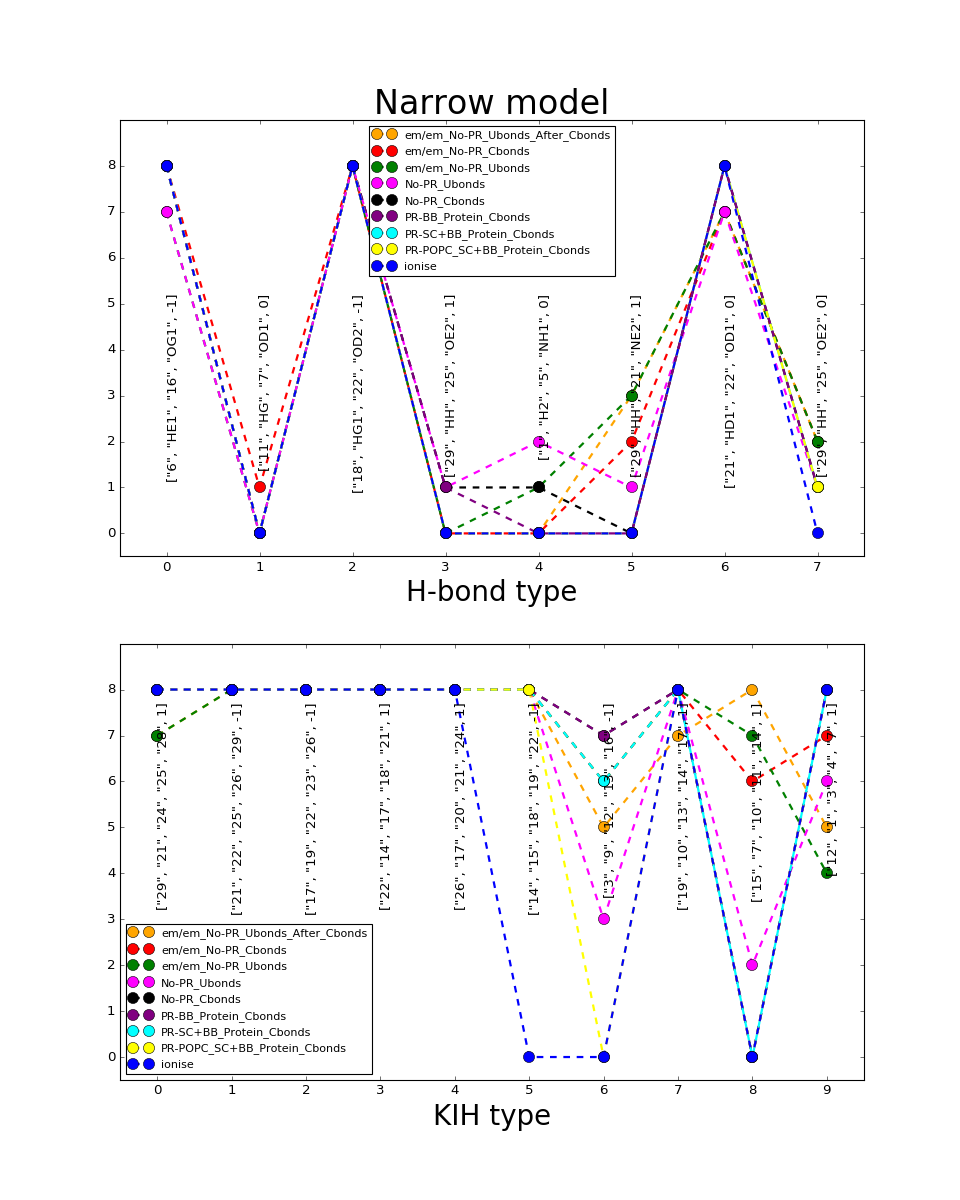

In [438]:
fig_freq,ax = plt.subplots(2,1,figsize=(12,15))

ax[0].set_title("Narrow model",fontsize=30)

for i in range(len(ordered_keys)):
    key = list(reversed(ordered_keys))[i]
    ax[0].plot(hbond_freq[key],marker="o",c=colors[i],markersize=10,linestyle="--",linewidth=2,label=key,alpha=1)

for i in range(len(B_hbonds)):
    ax[0].text(i,5,B_hbonds[i],fontsize=12,rotation=90)
       
ax[0].set_yticks(range(0,9))
ax[0].set_xticks(range(0,len(B_hbonds)+1))

for i in range(len(ordered_keys)):
    key = list(reversed(ordered_keys))[i]
    ax[1].plot(kih_freq[key],marker="o",c=colors[i],markersize=10,linestyle="--",linewidth=2,label=key,alpha=1)

for i in range(len(B_kihs)):
    ax[1].text(i,7.5,B_kihs[i],fontsize=12,rotation=90)

ax[1].set_yticks(range(0,9))
ax[1].set_xticks(range(0,len(B_kihs)+1))
    
ax[0].set_xlabel("H-bond type",fontsize=25)
ax[1].set_xlabel("KIH type",fontsize=25)

ax[0].set_xlim(-0.5,7.5)
ax[1].set_xlim(-0.5,9.5)
ax[0].set_ylim(-0.5,9)
ax[1].set_ylim(-0.5,9)

ax[0].legend(loc="upper center",prop={'size': 10})
ax[1].legend(loc="best",prop={'size': 10})

plt.show()

In [445]:
path="output/refined1_0001_INPUT_0007_ignorechain"

In [446]:
for stage in sem_stages:
    file = path+"/complex/em/"+"sem_"+stage+".gro"
    !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $file

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [447]:
for grof in ['ionise','em/em_No-PR_Ubonds','em/em_No-PR_Cbonds','em/em_No-PR_Ubonds_After_Cbonds']:
    file = path+"/complex/"+grof+".gro"
    !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $file

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [448]:
pdb_path = 'output/refined1_0001_INPUT_0007_ignorechain/refined1_0001_INPUT_0007_ignorechain.pdb'
# pdb_path = path+"/complex/em/sem_"+ sem_stages[0]+'.pdb'
# H-bonds data
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
# KIHs data
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]

print("Original docked model:")
print(set(S_hbonds))
print(set(S_kihs))

Original docked model:
{'["21", "HD1", "22", "OD1", 0]', '["18", "HG1", "22", "OD2", -1]'}
{'["21", "22", "25", "26", "29", -1]', '["17", "19", "22", "23", "26", -1]', '["22", "14", "17", "18", "21", 1]', '["26", "17", "20", "21", "24", 1]', '["16", "3", "6", "7", "10", 1]', '["3", "9", "12", "13", "16", -1]', '["12", "1", "3", "4", "7", 1]'}


In [449]:
all_hbonds = {}
all_kihs = {}

for i in range(len(sem_stages)):
    pdb_path = path+"/complex/em/sem_"+ sem_stages[i]+'.pdb'
    # Get H-bonds
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
    S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
    all_hbonds[sem_stages[i]] = S_hbonds
    # Get KIHs 
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
    S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]
    all_kihs[sem_stages[i]] = S_kihs

for f in ['ionise','em/em_No-PR_Ubonds','em/em_No-PR_Cbonds','em/em_No-PR_Ubonds_After_Cbonds']:
    pdb_path = path+"/complex/"+f+".pdb"
    # Get H-bonds
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb_path)]
    S_hbonds = [json.dumps(hb[:-1]+[interaction_direction(hb[-1])]) for hb in hbonds_data]
    all_hbonds[f] = S_hbonds
    # Get KIHs 
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb_path)]
    S_kihs = [json.dumps(kih[:-1]+[interaction_direction(kih[-1])]) for kih in kihs_data]
    all_kihs[f] = S_kihs

In [450]:
B_hbonds = set()
for key in all_hbonds.keys():
    B_hbonds = B_hbonds.union(set(all_hbonds[key]))

In [451]:
B_hbonds = list(B_hbonds)

In [452]:
B_hbonds

['["29", "HH", "25", "OE2", 1]',
 '["18", "HG1", "22", "OD2", -1]',
 '["29", "HH", "21", "NE2", 1]',
 '["29", "HH", "25", "OE1", 1]',
 '["21", "HD1", "22", "OD1", 0]',
 '["29", "HH", "25", "OE2", 0]']

In [453]:
hbond_freq = {}
for key in all_hbonds.keys():
    data = []
    for bhb in B_hbonds:
        c = 0
        for hb in all_hbonds[key]:
            if hb == bhb:
                c += 1
        data.append(c)
    hbond_freq[key] = data

In [454]:
hbond_freq

{'No-PR_Cbonds': [1, 8, 1, 1, 8, 3],
 'No-PR_Ubonds': [1, 7, 1, 1, 8, 3],
 'PR-BB_Protein_Cbonds': [0, 8, 1, 1, 8, 3],
 'PR-POPC_SC+BB_Protein_Cbonds': [0, 8, 0, 0, 8, 2],
 'PR-SC+BB_Protein_Cbonds': [0, 8, 0, 0, 8, 3],
 'em/em_No-PR_Cbonds': [1, 7, 2, 2, 8, 1],
 'em/em_No-PR_Ubonds': [1, 7, 1, 2, 7, 1],
 'em/em_No-PR_Ubonds_After_Cbonds': [0, 7, 1, 4, 7, 1],
 'ionise': [0, 8, 0, 0, 8, 0]}

In [455]:
B_kihs = set()
for key in all_kihs.keys():
    B_kihs = B_kihs.union(set(all_kihs[key]))

In [456]:
B_kihs = list(B_kihs)

In [457]:
B_kihs

['["24", "26", "29", "30", "32", -1]',
 '["29", "21", "24", "25", "28", 1]',
 '["21", "22", "25", "26", "29", -1]',
 '["17", "19", "22", "23", "26", -1]',
 '["22", "14", "17", "18", "21", 1]',
 '["26", "17", "20", "21", "24", 1]',
 '["16", "3", "6", "7", "10", 1]',
 '["3", "9", "12", "13", "16", -1]',
 '["19", "10", "13", "14", "17", 1]',
 '["12", "1", "3", "4", "7", 1]']

In [458]:
kih_freq = {}
for key in all_kihs.keys():
    data = []
    for bkih in B_kihs:
        c = 0
        for kih in all_kihs[key]:
            if kih == bkih:
                c += 1
        data.append(c)
    kih_freq[key] = data

In [459]:
kih_freq

{'No-PR_Cbonds': [0, 1, 8, 8, 8, 8, 8, 8, 8, 8],
 'No-PR_Ubonds': [1, 5, 8, 8, 8, 8, 8, 8, 5, 8],
 'PR-BB_Protein_Cbonds': [0, 1, 8, 8, 8, 8, 8, 8, 8, 8],
 'PR-POPC_SC+BB_Protein_Cbonds': [0, 0, 8, 8, 8, 8, 8, 8, 8, 8],
 'PR-SC+BB_Protein_Cbonds': [0, 0, 8, 8, 8, 8, 8, 8, 8, 8],
 'em/em_No-PR_Cbonds': [1, 5, 8, 8, 8, 8, 8, 8, 7, 8],
 'em/em_No-PR_Ubonds': [1, 5, 8, 8, 8, 8, 8, 8, 5, 7],
 'em/em_No-PR_Ubonds_After_Cbonds': [0, 5, 8, 8, 8, 8, 8, 8, 6, 6],
 'ionise': [0, 0, 8, 8, 8, 8, 8, 8, 8, 8]}

<IPython.core.display.Javascript object>


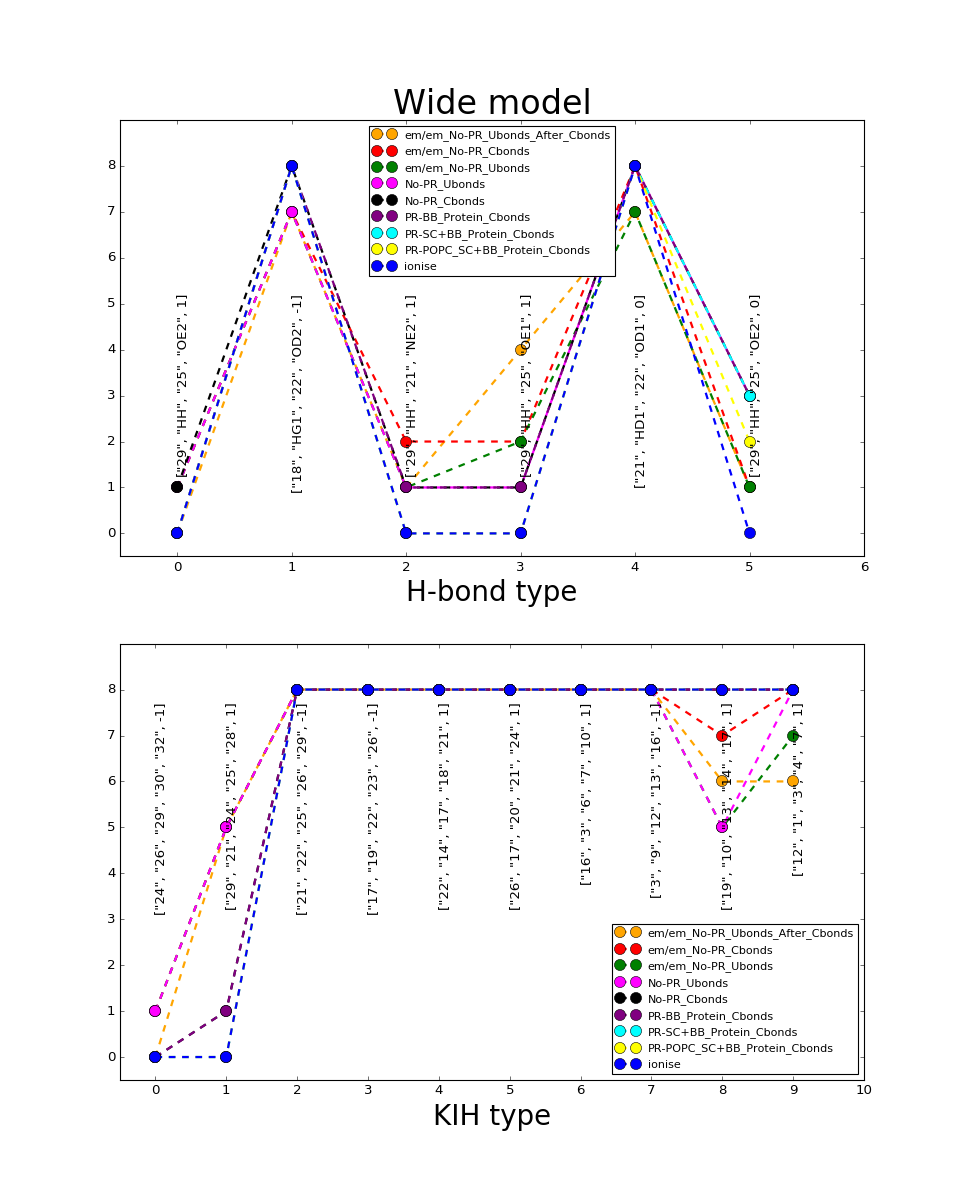

In [464]:
fig_freq2,ax = plt.subplots(2,1,figsize=(12,15))

ax[0].set_title("Wide model",fontsize=30)

for i in range(len(ordered_keys)):
    key = list(reversed(ordered_keys))[i]
    ax[0].plot(hbond_freq[key],marker="o",c=colors[i],markersize=10,linestyle="--",linewidth=2,label=key,alpha=1)

for i in range(len(B_hbonds)):
    ax[0].text(i,5,B_hbonds[i],fontsize=12,rotation=90)
       
ax[0].set_yticks(range(0,9))
ax[0].set_xticks(range(0,len(B_hbonds)+1))

for i in range(len(ordered_keys)):
    key = list(reversed(ordered_keys))[i]
    ax[1].plot(kih_freq[key],marker="o",c=colors[i],markersize=10,linestyle="--",linewidth=2,label=key,alpha=1)

for i in range(len(B_kihs)):
    ax[1].text(i,7.5,B_kihs[i],fontsize=12,rotation=90)

ax[1].set_yticks(range(0,9))
ax[1].set_xticks(range(0,len(B_kihs)+1))
    
ax[0].set_xlabel("H-bond type",fontsize=25)
ax[1].set_xlabel("KIH type",fontsize=25)

ax[0].set_xlim(-0.5,len(B_hbonds))
ax[1].set_xlim(-0.5,len(B_kihs))
ax[0].set_ylim(-0.5,9)
ax[1].set_ylim(-0.5,9)

ax[0].legend(loc="upper center",prop={'size': 10})
ax[1].legend(loc="best",prop={'size': 10})

plt.show()

TO-DOs:

1. Submit sEM to BCP4 for narrow/wide models

<h2 style="text-align:center"> Test: H-bonds and KIHs preservation after GROMACS embedding </h2>

In [479]:
from insert2db_interactions import get_OH_atoms
from insert2db_interactions import get_KIHs
from insert2db_interactions import interaction_direction
import json

In [480]:
path="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

**Pick structure from `narrow` group**

In [489]:
folder = "narrow"
pdb_name = "refined1_0001_INPUT_0002_ignorechain"

# Original docked model
pdb_original = path+"/"+folder+"/input/"+pdb_name+".pdb"

# Generate PDB after GROMACS processing (post-embedding)
gro_gmx = path+"/"+folder+"/output/"+pdb_name+"/complex/confout.gro"
!bash ~/mpmodeling/protocols/sem/gro2pdb.sh $gro_gmx
pdb_gmx = path+"/"+folder+"/output/"+pdb_name+"/complex/confout_Protein.pdb"

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [492]:
# Get all H-bonds/KIHs for originally docked structure
pdb = pdb_original
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
original_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
original_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]

# Get all H-bonds/KIHs for post-embedding protein structure
pdb = pdb_gmx
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
gmx_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
# KIHs data
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
gmx_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]

In [500]:
print("Identical H-bonds: ",set(original_hbonds) == set(gmx_hbonds))
print("Identical KIHs: ",set(original_kihs) == set(gmx_kihs))

Identical H-bonds:  True
Identical KIHs:  True


**Pick structure from `wide` group**

In [501]:
folder = "wide"
pdb_name = "refined1_0001_INPUT_0007_ignorechain"

# Original docked model
pdb_original = path+"/"+folder+"/input/"+pdb_name+".pdb"

# Generate PDB after GROMACS processing (post-embedding)
gro_gmx = path+"/"+folder+"/output/"+pdb_name+"/complex/confout.gro"
!bash ~/mpmodeling/protocols/sem/gro2pdb.sh $gro_gmx
pdb_gmx = path+"/"+folder+"/output/"+pdb_name+"/complex/confout_Protein.pdb"

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

In [514]:
# Get all H-bonds/KIHs for originally docked structure
pdb = pdb_original
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
original_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
original_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]

# Get all H-bonds/KIHs for post-embedding protein structure
pdb = pdb_gmx
hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
gmx_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
# KIHs data
kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
gmx_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]

In [515]:
print("Identical H-bonds: ",set(original_hbonds) == set(gmx_hbonds))
print("Identical KIHs: ",set(original_kihs) == set(gmx_kihs))

Identical H-bonds:  True
Identical KIHs:  False


In [516]:
set(original_kihs).difference(set(gmx_kihs))

set()

In [517]:
set(gmx_kihs).difference(set(original_kihs))

{'["19", "10", "13", "14", "17", "AH"]',
 '["19", "10", "13", "14", "17", "BA"]',
 '["19", "10", "13", "14", "17", "CB"]',
 '["19", "10", "13", "14", "17", "DC"]',
 '["19", "10", "13", "14", "17", "ED"]',
 '["19", "10", "13", "14", "17", "FE"]',
 '["19", "10", "13", "14", "17", "GF"]',
 '["19", "10", "13", "14", "17", "HG"]'}

In [518]:
p = isambard_dev.ampal.convert_pdb_to_ampal(pdb_original)
for resn in range(len(p.sequences[0])):
    if (resn+1) in [19, 10, 13, 14, 17]:
        print(p.sequences[0][resn], resn+1 )

I 10
L 13
V 14
I 17
G 19


**<span style="color:red">NOTE</span>**: Seems GROMACS modification due to lower coordinate resolution in `.gro` files may introduce variations that allow identification of KIHs. 

<h1 style="text-align:center">Extraction and comparison of pre- and post-EM docked structures</h1>

**Process**:

1. Cosider only output structures from No-PR, bond-unconstrained, energy minimised structures. Generate protein PDBs for `isambard`.
    > Since most structures reached successful steepest descent convergence for EM of this type
   
2. Extract all H-bonds OH-atom pair types for all structures (pre- and post-EM) and their multiplicity, for both narrow and wide models. Likewise for KIHs.

3. Find *base set* of OH-atom types. Likewise for KIHs.
    > Note that the *base set* is not unique as this may be slightly different when considering further MD stages, such as PRMD and MD. 

4. Determine the average number of chain-pairs that feature certain OH-type (or KIH type).
    > Plot curves featuring the SD per OH-(KIH-)type.

#### 1. Extract all post-EM protein PDBs

In [566]:
import os

In [562]:
# Working directory path
path = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

# Extract pdb names for narrow/wide models
pdbnames_narrow = !ls {path}/narrow/input
pdbnames_narrow = [pdb[:-4] for pdb in pdbnames_narrow]

pdbnames_wide = !ls {path}/wide/input
pdbnames_wide = [pdb[:-4] for pdb in pdbnames_wide]

In [ ]:
# Extract of post-EM protein PDBs (No-PR, Unconstrained bonds)
postEM_pdbs = {}
for group in ["narrow", "wide"]:
    # Define pdbname space and paths to post-EM pdbs
    if group == "narrow":
        pdbnames = pdbnames_narrow
        postEM_pdbs["narrow"] = {}
        mydic = postEM_pdbs["narrow"]
    elif group == "wide":
        pdbnames = pdbnames_wide
        postEM_pdbs["wide"] = {}
        mydic = postEM_pdbs["wide"]
    for pdb in pdbnames:
        gro_gmx = path+"/"+group+"/output/"+pdb+"/complex/em/em_No-PR_Ubonds.gro"
        if os.path.isfile(gro_gmx):
            !bash ~/mpmodeling/protocols/sem/gro2pdb.sh $gro_gmx
            pdb_gmx = path+"/"+group+"/output/"+pdb+"/complex/em/em_No-PR_Ubonds_Protein.pdb"
            mydic[pdb] = pdb_gmx
        else:
            mydic[pdb] = "NoFile"

GROMACS:    gmx make_ndx, VERSION 5.0.6

GROMACS is written by:
Emile Apol         Rossen Apostolov   Herman J.C. Berendsen Par Bjelkmar       
Aldert van Buuren  Rudi van Drunen    Anton Feenstra     Sebastian Fritsch  
Gerrit Groenhof    Christoph Junghans Peter Kasson       Carsten Kutzner    
Per Larsson        Justin A. Lemkul   Magnus Lundborg    Pieter Meulenhoff  
Erik Marklund      Teemu Murtola      Szilard Pall       Sander Pronk       
Roland Schulz      Alexey Shvetsov    Michael Shirts     Alfons Sijbers     
Peter Tieleman     Christian Wennberg Maarten Wolf       
and the project leaders:
Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2014, The GROMACS development team at
Uppsala University, Stockholm University and
the Royal Institute of Technology, Sweden.
check out http://www.gromacs.org for more information.

GROMACS is free software; you can redistribute it and/or

#### 2. Find all H-bonds and KIHs: original and post-EM models, for narrow and wide models

In [576]:
from insert2db_interactions import get_OH_atoms
from insert2db_interactions import get_KIHs
from insert2db_interactions import interaction_direction
import json

In [579]:
def find_interactions(pdb):
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
    pdb_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
    # KIHs data
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
    pdb_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]
    return pdb_hbonds, pdb_kihs

In [581]:
Hbonds_data = {}
KIHs_data = {}
for group in ["narrow", "wide"]:
    # Define pdbname space and paths to post-EM pdbs
    pdbnames = list(postEM_pdbs[group].keys())
    Hbonds_data[group] = {}
    KIHs_data[group] = {}
    for pdb in pdbnames:
        Hbonds_data[group][pdb] = {}
        KIHs_data[group][pdb] = {}
        # Find interactions for originally docked model
        pdb_original = path+"/"+group+"/input/"+pdb+".pdb"
        pdb_hbonds, pdb_kihs = find_interactions(pdb_original)
        # Find interactions for post-EM docked model
        pdb_postEM = postEM_pdbs[group][pdb]
        if pdb_postEM != "NoFile":
            hbonds_postEM, kihs_postEM = find_interactions(pdb_postEM)
            # Store data in dic
            Hbonds_data[group][pdb] = {"original":pdb_hbonds, "em":hbonds_postEM}
            KIHs_data[group][pdb] = {"original":pdb_kihs, "em":kihs_postEM}
        else:
            Hbonds_data[group][pdb] = {"original":pdb_hbonds, "em":"NoFile"}
            KIHs_data[group][pdb] = {"original":pdb_kihs, "em":"NoFile"}

Save dictionaries as JSON files

In [593]:
with open(path+'/'+'Hbonds_Original_PostEM.json', 'w') as fp:
    json.dump(Hbonds_data, fp)

In [594]:
with open(path+'/'+'KIHs_Original_PostEM.json', 'w') as fp:
    json.dump(KIHs_data, fp)

#### 3. Find base sets of OH-atom types and KIHs

Get all H-bonds and KIHs identities, then reduce by defining their direction in the assembly.

In [641]:
S_hbonds = set()
for group in ["wide","narrow"]:
    for pdb in list(Hbonds_data[group].keys()):
        data0 = Hbonds_data[group][pdb]
        for type in ["original","em"]:
            data1 = data0[type]
            if data1 != "NoFile":
                S_hbonds = S_hbonds.union(set(data1))

In [644]:
S_kihs = set()
for group in ["wide","narrow"]:
    for pdb in list(KIHs_data[group].keys()):
        data0 = KIHs_data[group][pdb]
        for type in ["original","em"]:
            data1 = data0[type]
            if data1 != "NoFile":
                S_kihs = S_kihs.union(set(data1))

Reduced interaction base sets

In [659]:
S_hbonds = set([json.dumps(x[:-1]+[interaction_direction(x[-1])]) for x in [json.loads(x) for x in list(S_hbonds)]])

In [660]:
S_kihs = set([json.dumps(x[:-1]+[interaction_direction(x[-1])]) for x in [json.loads(x) for x in list(S_kihs)]])

#### 4. Find average interaction multiplicity per conformation group

<p style="text-align:center">Hydrogen bonds</p>

In [715]:
Hbonds_stats = {}

for group in ["narrow","wide"]:
    Hbonds_stats[group] = {}
    if group == "narrow":
        pdbnames = pdbnames_narrow
    elif group == "wide":
        pdbnames = pdbnames_wide
    for pdb in pdbnames:
        Hbonds_stats[group][pdb] = {}
        hbonds_model = Hbonds_data[group][pdb]
        if hbonds_model["em"] != "NoFile":
            for model_type in ["original","em"]:
                shb_vector = []
                for shb in S_hbonds:
                    c = 0
                    for x in hbonds_model[model_type]:
                        hb_raw = json.loads(x)
                        hb = json.dumps(hb_raw[:-1]+[interaction_direction(hb_raw[-1])])
                        if hb == shb:
                            c+=1
                    shb_vector.append(c)
                Hbonds_stats[group][pdb][model_type] = shb_vector    
        else:
            for model_type in ["original","em"]:
                Hbonds_stats[group][pdb][model_type] = "NA"

<IPython.core.display.Javascript object>


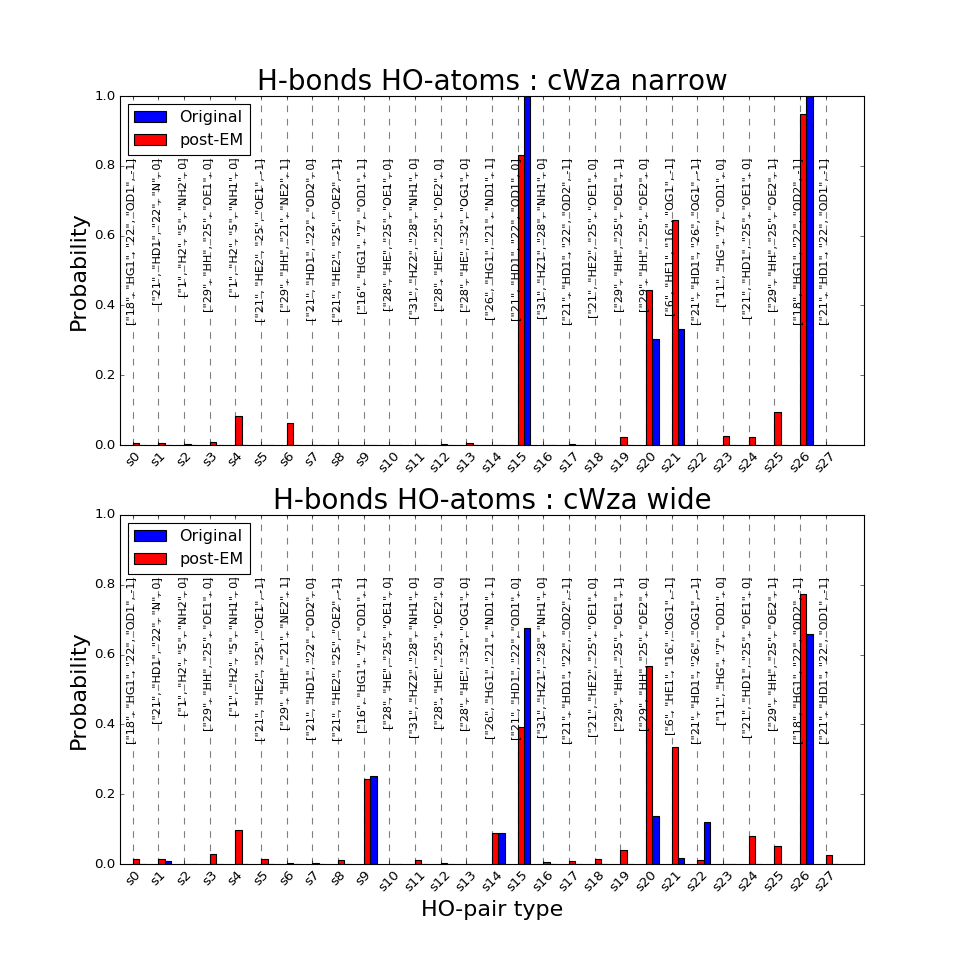

In [839]:
fig_hb_original, ax = plt.subplots(2,1,figsize=(12,12))

################################################################
X = numpy.zeros(len(S_hbonds))
Y = numpy.zeros(len(S_hbonds))
N_models = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1

ax[0].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original")
ax[0].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_models),color="red",width=0.25,label="post-EM")

ax[0].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[0].set_ylim(0,1)

ax[0].set_xticks(range(len(S_hbonds)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[0].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S_hbonds)):
    ax[0].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[0].set_title("H-bonds HO-atoms : cWza narrow",fontsize=25)
################################################################
X = numpy.zeros(len(S_hbonds))
Y = numpy.zeros(len(S_hbonds))
N_models = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1

ax[1].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original")
ax[1].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_models),color="red",width=0.25,label="post-EM")

ax[1].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[1].set_ylim(0,1)

ax[1].set_xlabel("HO-pair type",fontsize=20)
ax[1].set_xticks(range(len(S_hbonds)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[1].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S_hbonds)):
    ax[1].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[1].set_title("H-bonds HO-atoms : cWza wide",fontsize=25)
################################################################

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
plt.show()

<IPython.core.display.Javascript object>


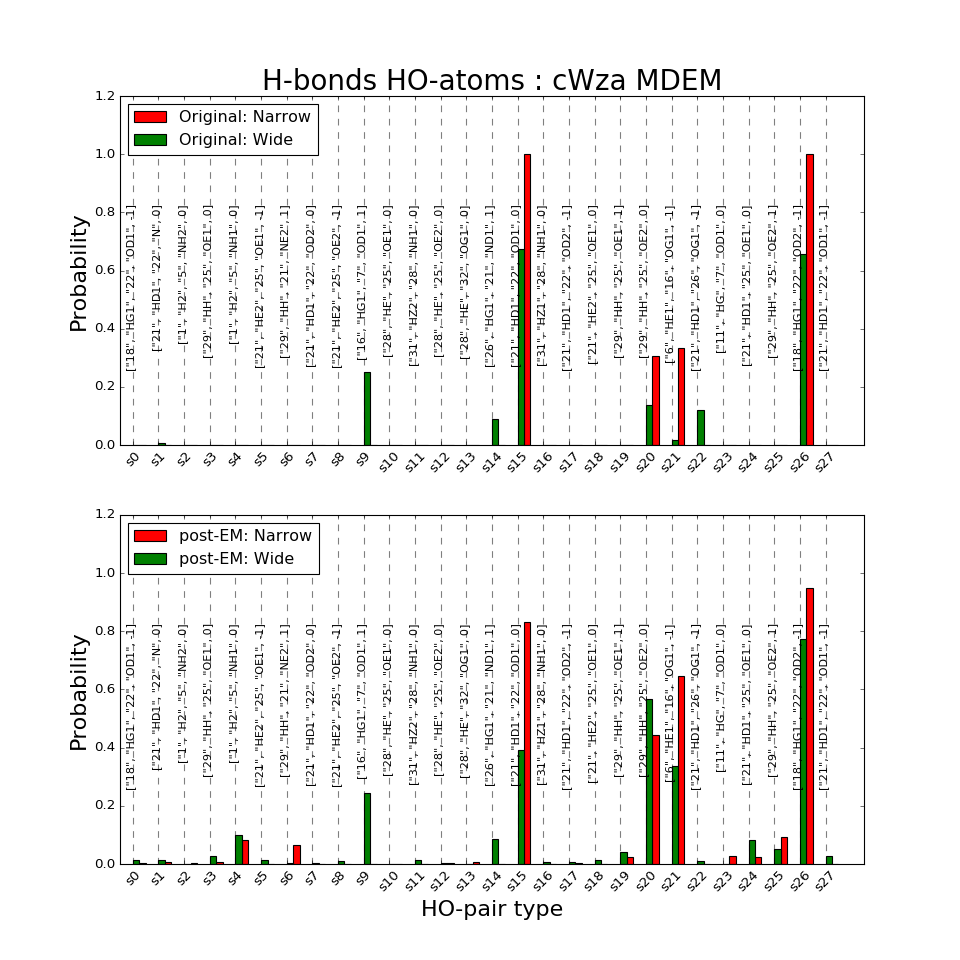

In [962]:
fig_hb_comparison, ax = plt.subplots(2,1,figsize=(12,12))

################################################################
X = numpy.zeros(len(S_hbonds))
N_narrow = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        N_narrow += 1

Y = numpy.zeros(len(S_hbonds))
N_wide = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["original"])
        N_wide += 1
        
ax[0].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="Original: Narrow")
ax[0].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_wide),color="green",width=0.25,label="Original: Wide")

ax[0].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S_hbonds)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S_hbonds)):
    ax[0].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[0].set_title("H-bonds HO-atoms : cWza MDEM",fontsize=25)
################################################################
X = numpy.zeros(len(S_hbonds))
N_narrow = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["em"])
        N_narrow += 1

Y = numpy.zeros(len(S_hbonds))
N_wide = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["em"])
        N_wide += 1

ax[1].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="post-EM: Narrow")
ax[1].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_wide),color="green",width=0.25,label="post-EM: Wide")

ax[1].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xlabel("HO-pair type",fontsize=20)
ax[1].set_xticks(range(len(S_hbonds)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S_hbonds)):
    ax[1].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

################################################################

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
plt.show()

<p style="text-align:center">KIHs</p>

In [781]:
KIHs_stats = {}

for group in ["narrow","wide"]:
    KIHs_stats[group] = {}
    if group == "narrow":
        pdbnames = pdbnames_narrow
    elif group == "wide":
        pdbnames = pdbnames_wide
    for pdb in pdbnames:
        KIHs_stats[group][pdb] = {}
        kihs_model = KIHs_data[group][pdb]
        if kihs_model["em"] != "NoFile":
            for model_type in ["original","em"]:
                skih_vector = []
                for skih in S_kihs:
                    c = 0
                    for x in kihs_model[model_type]:
                        kih_raw = json.loads(x)
                        kih = json.dumps(kih_raw[:-1]+[interaction_direction(kih_raw[-1])])
                        if kih == skih:
                            c+=1
                    skih_vector.append(c)
                KIHs_stats[group][pdb][model_type] = skih_vector    
        else:
            for model_type in ["original","em"]:
                KIHs_stats[group][pdb][model_type] = "NA"

<IPython.core.display.Javascript object>


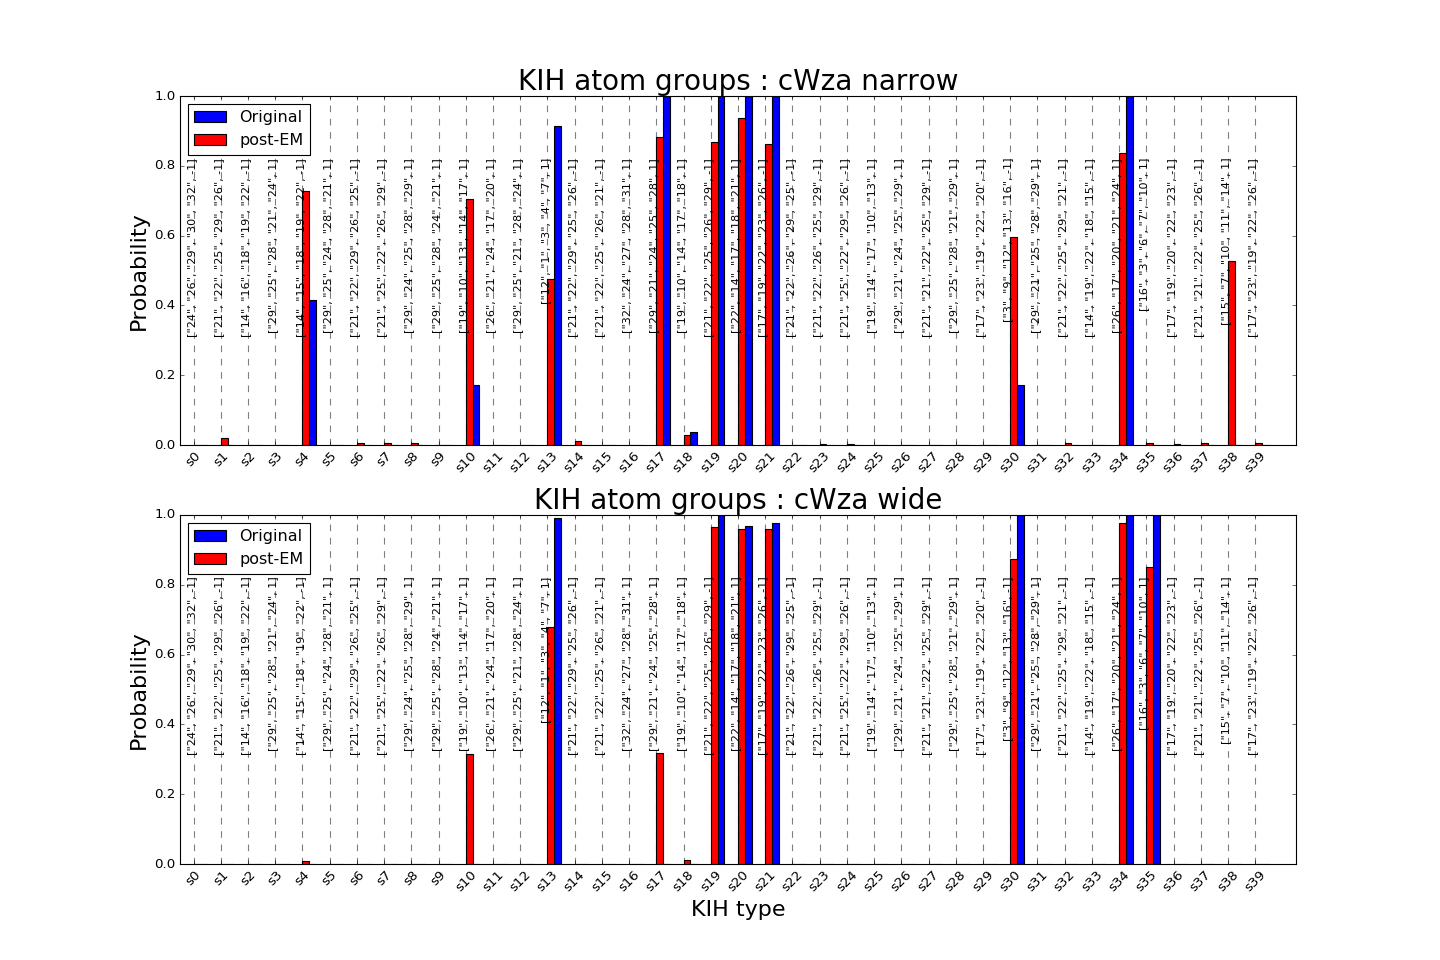

In [833]:
fig_kih_original, ax = plt.subplots(2,1,figsize=(18,12))
################################################################
S = S_kihs
X = numpy.zeros(len(S))
Y = numpy.zeros(len(S))
N_models = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1
        
ax[0].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original")
ax[0].bar(numpy.arange(len(S)),Y/float(8*N_models),color="red",width=0.25,label="post-EM")

ax[0].set_xlim(-0.5,len(S)+0.5)
ax[0].set_ylim(0,1)

ax[0].set_xticks(range(len(S_kihs)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[0].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[0].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[0].set_title("KIH atom groups : cWza narrow",fontsize=25)
################################################################
X = numpy.zeros(len(S))
Y = numpy.zeros(len(S))
N_models = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1
        
ax[1].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original")
ax[1].bar(numpy.arange(len(S)),Y/float(8*N_models),color="red",width=0.25,label="post-EM")

ax[1].set_xlim(-0.5,len(S)+0.5)
ax[1].set_ylim(0,1)

ax[1].set_xlabel("KIH type",fontsize=20)
ax[1].set_xticks(range(len(S_kihs)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[1].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[1].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[1].set_title("KIH atom groups : cWza wide",fontsize=25)
################################################################

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
plt.show()

<IPython.core.display.Javascript object>


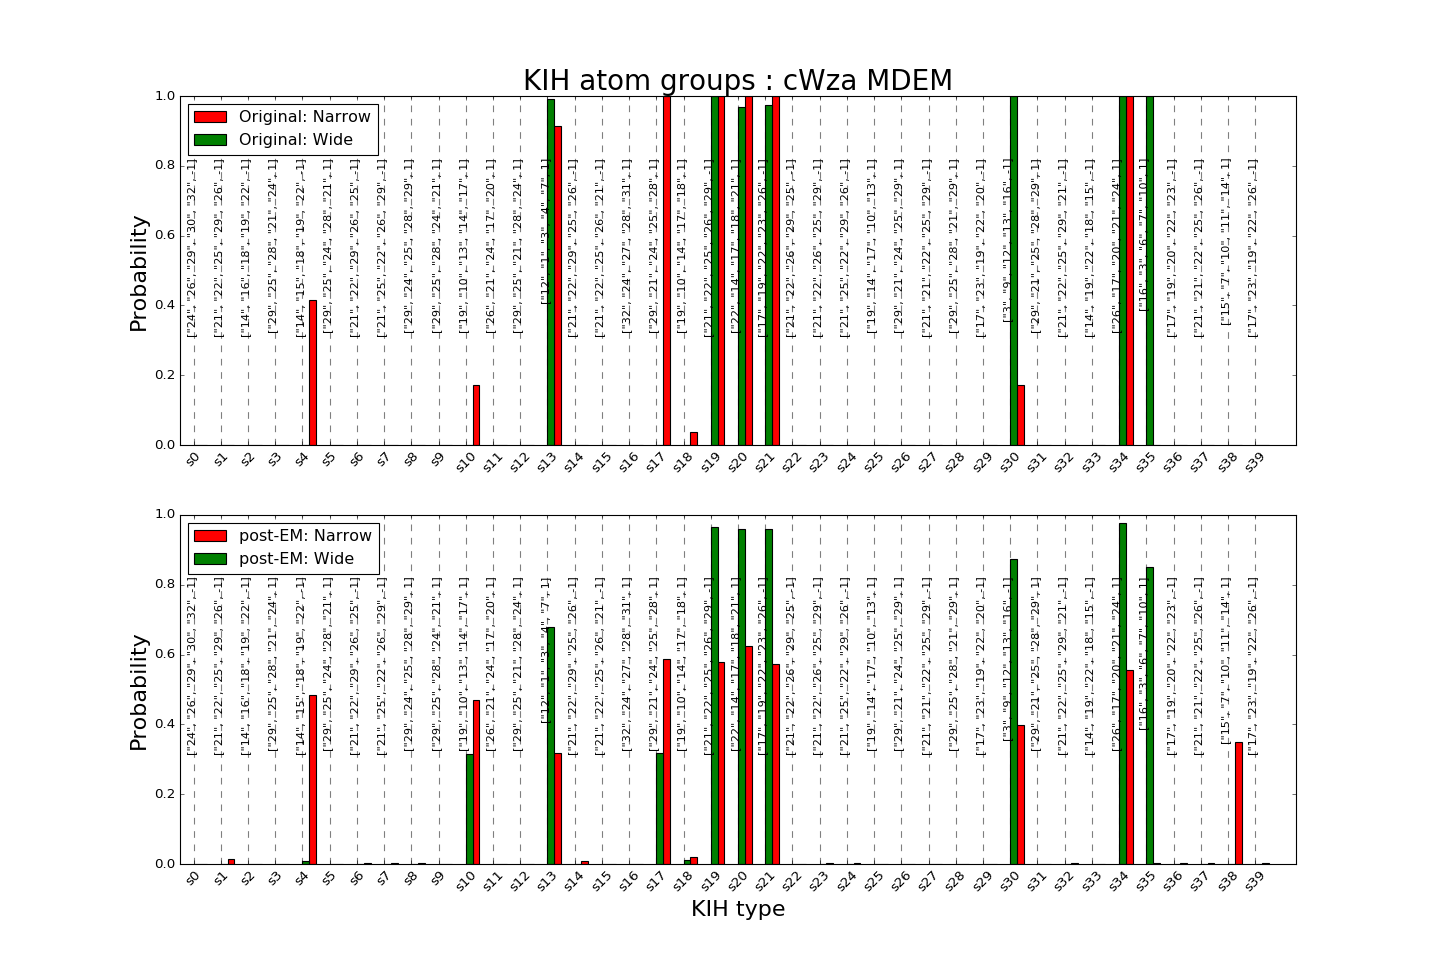

In [843]:
fig_kih_original, ax = plt.subplots(2,1,figsize=(18,12))
################################################################
S = S_kihs
X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["original"])
        N_wide += 1
        
ax[0].bar(numpy.arange(len(S))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="Original: Narrow")
ax[0].bar(numpy.arange(len(S)),Y/float(8*N_wide),color="green",width=0.25,label="Original: Wide")

ax[0].set_xlim(-0.5,len(S)+0.5)
ax[0].set_ylim(0,1)

ax[0].set_xticks(range(len(S_kihs)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[0].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[0].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[0].set_title("KIH atom groups : cWza MDEM",fontsize=25)
################################################################
X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["em"])
        N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["em"])
        N_wide += 1
        
ax[1].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="red",width=0.25,label="post-EM: Narrow")
ax[1].bar(numpy.arange(len(S)),Y/float(8*N_models),color="green",width=0.25,label="post-EM: Wide")

ax[1].set_xlim(-0.5,len(S)+0.5)
ax[1].set_ylim(0,1)

ax[1].set_xlabel("KIH type",fontsize=20)
ax[1].set_xticks(range(len(S_kihs)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[1].plot((i,i),(0,1),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[1].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

################################################################

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
plt.show()

**TO-DO**

* Double check identity and number of H-bonds and KIHs of docked models.
* Interpret recent data ...
* Compare recent post-EM data with old one
* Do interaction analysis for cWzaK375C and cWzaY373C

<h2 style="text-align:center">Consistency check</h2>

Extract H-bond data from file. Original analysis.

In [851]:
with open(path0+'/'+'refined1_sc_hbonds_AB.json') as f:
    hbonds_analysis0 = json.load(f)

In [854]:
hbonds_analysis0["model_0007"]

['<Hydrogen Bond between (29B) TYR-HH ||||| OE2-GLU (25B)>',
 '<Hydrogen Bond between (7A) ASN-HD22 ||||| OE1-GLN (12B)>',
 '<Hydrogen Bond between (18A) THR-HG1 ||||| OD2-ASP (22B)>',
 '<Hydrogen Bond between (29A) TYR-HH ||||| OE2-GLU (25A)>',
 '<Hydrogen Bond between (21A) HIS-HD1 ||||| OD1-ASP (22A)>',
 '<Hydrogen Bond between (21A) HIS-HE2 ||||| OE2-GLU (25B)>',
 '<Hydrogen Bond between (21B) HIS-HD1 ||||| OD1-ASP (22B)>']

Get OH-atoms using new libraries

In [862]:
path_chainAB = path0+'/'+'ABchains/ChainAB_refined1_0001_INPUT_'+format(7,'04d')+'_ignorechain.pdb'
hbonds_ChainAB = get_OH_atoms(path_chainAB)

In [863]:
hbonds_ChainAB

['["21", "HD1", "22", "OD1", "AA"]',
 '["18", "HG1", "22", "OD2", "AB"]',
 '["21", "HD1", "22", "OD1", "BB"]']

In [864]:
def my_get_OH_atoms(file):
	"""Get all OH-atoms per H-bond in PDB, in residue-number/OH-atom format plus chain direction"""
	try:
		p = isambard_dev.ampal.convert_pdb_to_ampal(file)
		hbonds = isambard_dev.interactions.find_hydrogen_bonds(p)
		# Find all H-bonds and select those between sidechain atoms
		sc_hbonds_raw = [hb for hb in hbonds if hb.is_sidechain_sidechain == True]
		sc_hbonds_reduced = []
		for hb in sc_hbonds_raw:
			donor_H = [hb.donor.ampal_parent.id , hb.donor.res_label]
			acceptor_O = [hb.acceptor.ampal_parent.id , hb.acceptor.res_label]
			direction_HO = hb.donor.unique_id[0]+hb.acceptor.unique_id[0]
			hb_reduced = donor_H+acceptor_O+[direction_HO]
			data = json.dumps(hb_reduced)
			sc_hbonds_reduced.append( data )
	except:
		sc_hbonds_reduced = 'NoFile'
	return sc_hbonds_reduced

In [865]:
print(my_get_OH_atoms(path_chainAB))

['["21", "HD1", "22", "OD1", "BB"]', '["21", "HD1", "22", "OD1", "AA"]', '["18", "HG1", "22", "OD2", "AB"]']


In [867]:
def my_get_OH_atoms2(file):
    """Get all OH-atoms per H-bond in PDB, in residue-number/OH-atom format plus chain direction"""
    try:
        p = isambard_dev.ampal.convert_pdb_to_ampal(file)
        p_wh = isambard_dev.external_programs.assembly_plus_protons(p.pdb, path=False)
        hbonds = isambard_dev.interactions.find_hydrogen_bonds(p_wh)
        # Find all H-bonds and select those between sidechain atoms
        sc_hbonds_raw = [hb for hb in hbonds if hb.is_sidechain_sidechain == True]
        sc_hbonds_reduced = []
        for hb in sc_hbonds_raw:
            donor_H = [hb.donor.ampal_parent.id , hb.donor.res_label]
            acceptor_O = [hb.acceptor.ampal_parent.id , hb.acceptor.res_label]
            direction_HO = hb.donor.unique_id[0]+hb.acceptor.unique_id[0]
            hb_reduced = donor_H+acceptor_O+[direction_HO]
            data = json.dumps(hb_reduced)
            sc_hbonds_reduced.append( data )
    except:
        sc_hbonds_reduced = 'NoFile'
    return sc_hbonds_reduced

In [869]:
for x in my_get_OH_atoms2(path_chainAB):
    print(x)

["21", "HD1", "22", "OD1", "BB"]
["21", "HE2", "25", "OE2", "AB"]
["29", "HH", "25", "OE2", "AA"]
["18", "HG1", "22", "OD2", "AB"]
["29", "HH", "25", "OE2", "BB"]
["7", "HD22", "12", "OE1", "AB"]
["21", "HD1", "22", "OD1", "AA"]


In [854]:
hbonds_analysis0["model_0007"]

['<Hydrogen Bond between (29B) TYR-HH ||||| OE2-GLU (25B)>',
 '<Hydrogen Bond between (7A) ASN-HD22 ||||| OE1-GLN (12B)>',
 '<Hydrogen Bond between (18A) THR-HG1 ||||| OD2-ASP (22B)>',
 '<Hydrogen Bond between (29A) TYR-HH ||||| OE2-GLU (25A)>',
 '<Hydrogen Bond between (21A) HIS-HD1 ||||| OD1-ASP (22A)>',
 '<Hydrogen Bond between (21A) HIS-HE2 ||||| OE2-GLU (25B)>',
 '<Hydrogen Bond between (21B) HIS-HD1 ||||| OD1-ASP (22B)>']

**<span style="color:red">IMPORTANT NOTE</span>**:

The `isambard` method that adds hydrogens generate **spurious H-bonds** in docked PDBs.
Removed this from current analysis to only consider original H-bonds.

```python
p_wh = isambard_dev.external_programs.assembly_plus_protons(p.pdb, path=False)

```

<h2 style="text-align:center">Repetion of interactions analysis for narrow/wide <em>cWza</em> models</h2>

1. Find backbone-assembly radii values ($r_{BB}$) for all models,

2. Filter out those models with mean narrow and wide radii, within a common standard deviation,
> Check identity is identical with currently analysed models

3. Find H-bonds and KIHs for these models; make sure no *spurious protons* are added,

4. See whether any noticeable difference appears between narrow and wide groups,

5. Compare with current results

6. Visualise location of H-bonds and KIHs in PDB. VMD shots.

**1. Find backbone-assembly radii values (rBB) for all models**

In [870]:
path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/cc-fitting/input/"

In [872]:
def get_COM_bb_distance(pdb):
	try:
		p = isambard_dev.ampal.convert_pdb_to_ampal(pdb)
		ccom = p.centre_of_mass
		n_chains = len(p.sequences)
		com_dd_distances = []
		for k in range(n_chains):
			com_dd_distances.append(numpy.linalg.norm(p[k].centre_of_mass - ccom))
		return json.dumps(com_dd_distances)
	except:
		return 'NoFile'

In [877]:
r_bb_data = []
for i in range(1000):
    pdb = path0+'refined1_0001_INPUT_'+format(i+1,'04d')+'_ignorechain'+'.pdb'
    r_bb_data.append(numpy.mean(json.loads(get_COM_bb_distance(pdb))))

Saved radial data in JSON file

<IPython.core.display.Javascript object>


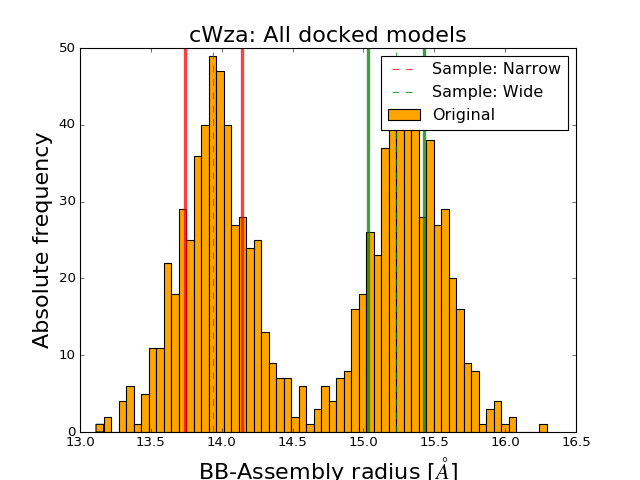

In [897]:
com_hist = plt.figure(dpi=80)

plt.hist(r_bb_data,bins=60,color='orange',label='Original')

plt.title("cWza: All docked models",fontsize=20)
plt.xlabel("BB-Assembly radius [$\AA$]",fontsize=20)
plt.ylabel("Absolute frequency",fontsize=20)

mean_narrow = 13.94
mean_wide = 15.23
std = 0.2
plt.plot((mean_narrow-std,mean_narrow-std),(0,50),linestyle="-",linewidth=3,color="red",alpha=0.75)
plt.plot((mean_narrow,mean_narrow),(0,50),linestyle="--",linewidth=1,color="red",alpha=0.75,label="Sample: Narrow")
plt.plot((mean_narrow+std,mean_narrow+std),(0,50),linestyle="-",linewidth=3,color="red",alpha=0.75)

plt.plot((mean_wide-std,mean_wide-std),(0,50),linestyle="-",linewidth=3,color="green",alpha=0.75)
plt.plot((mean_wide,mean_wide),(0,50),linestyle="--",linewidth=1,color="green",alpha=0.75,label="Sample: Wide")
plt.plot((mean_wide+std,mean_wide+std),(0,50),linestyle="-",linewidth=3,color="green",alpha=0.75)

plt.legend(loc='best')
plt.show()

**2. Find all models corresponding to the samples of narrow/wide models**

In [1043]:
# Sample for Narrow/Wide models
models_narrow_bb = []
models_wide_bb = []
# Mean and Std  of BB-Assembly Radii for Narrow/Wide models
mean_narrow = 13.94
mean_wide = 15.23
std = 0.2

for i in range(1000):
    d = r_bb_data[i]
    if (mean_narrow-std) < d < (mean_narrow+std):
        models_narrow_bb.append(format(i+1,'04d'))
    elif (mean_wide-std) < d < (mean_wide+std):
        models_wide_bb.append(format(i+1,'04d'))

Number of narrow and wide models

In [1044]:
len(models_narrow_bb)

286

In [1045]:
len(models_wide_bb)

272

**3. Find H-bonds and KIHs for these models**

In [911]:
path0 = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/clustering/ABchains/'

**<p style="text-align:center"> H-bonds </p>**

In [948]:
S_hbonds_narrow_wide = {}
for model_type in ['narrow','wide']:
    # Define list of sample models
    if model_type == 'narrow':
        models_list = models_narrow_bb
    elif model_type == 'wide':
        models_list = models_wide_bb
    for nmodel in models_list:
        path_chainAB = path0+'ChainAB_refined1_0001_INPUT_'+str(nmodel)+'_ignorechain.pdb'
        #!ls {path_chainAB}
        S_reduced_interactions_model = []
        for x in get_OH_atoms(path_chainAB):
            hb_raw = json.loads(x)
            hb = json.dumps(hb_raw[:-1]+[interaction_direction(hb_raw[-1])])
            S_reduced_interactions_model.append(hb)
        S_hbonds_narrow_wide[nmodel] = list(set(S_reduced_interactions_model))

In [953]:
S_hbonds_sample = set()
for s in list(S_hbonds_narrow_wide.values()):
    S_hbonds_sample = S_hbonds_sample.union(set(s))

In [958]:
Hbonds_stats_sample = {}
for model_type in ['narrow','wide']:
    # Define list of sample models
    if model_type == 'narrow':
        Hbonds_stats_sample[model_type] = {}
        models_list = models_narrow_bb
    elif model_type == 'wide':
        Hbonds_stats_sample[model_type] = {}
        models_list = models_wide_bb
    for nmodel in models_list:
        hbonds_model = S_hbonds_narrow_wide[str(nmodel)]
        # Define OH-atom type decomposition vector
        shb_vector = []
        for shb in S_hbonds_sample:
            c = 0
            for hb in hbonds_model:
                if hb == shb:
                    c+=1
            shb_vector.append(c)
        Hbonds_stats_sample[model_type][nmodel] = shb_vector

**<p style="text-align:center"> KIHs </p>**

In [925]:
S_kihs_narrow_wide = []
for model_type in ['narrow','wide']:
    # Define list of sample models
    if model_type == 'narrow':
        models_list = models_narrow_bb
    elif model_type == 'wide':
        models_list = models_wide_bb
    for nmodel in models_list:
        path_chainAB = path0+'ChainAB_refined1_0001_INPUT_'+str(nmodel)+'_ignorechain.pdb'
        #!ls {path_chainAB}
        for x in get_KIHs(path_chainAB):
            kih_raw = json.loads(x)
            kih = json.dumps(kih_raw[:-1]+[interaction_direction(kih_raw[-1])])
            S_kihs_narrow_wide.append(kih)

In [926]:
S_kihs_sample = set(S_kihs_narrow_wide)

In [928]:
KIHs_stats_sample = {}
for model_type in ['narrow','wide']:
    # Define list of sample models
    if model_type == 'narrow':
        KIHs_stats_sample[model_type] = {}
        models_list = models_narrow_bb
    elif model_type == 'wide':
        KIHs_stats_sample[model_type] = {}
        models_list = models_wide_bb
    for nmodel in models_list:
        # Extract H-bonds per model
        path_chainAB = path0+'ChainAB_refined1_0001_INPUT_'+str(nmodel)+'_ignorechain.pdb'
        kihs_model = get_KIHs(path_chainAB)
        # Define OH-atom type decomposition vector
        skih_vector = []
        for skih in S_kihs_sample:
            c = 0
            for x in kihs_model:
                kih_raw = json.loads(x)
                kih = json.dumps(kih_raw[:-1]+[interaction_direction(kih_raw[-1])])
                if kih == skih:
                    c+=1
            skih_vector.append(c)
        KIHs_stats_sample[model_type][nmodel] = skih_vector

All plotted data

<IPython.core.display.Javascript object>


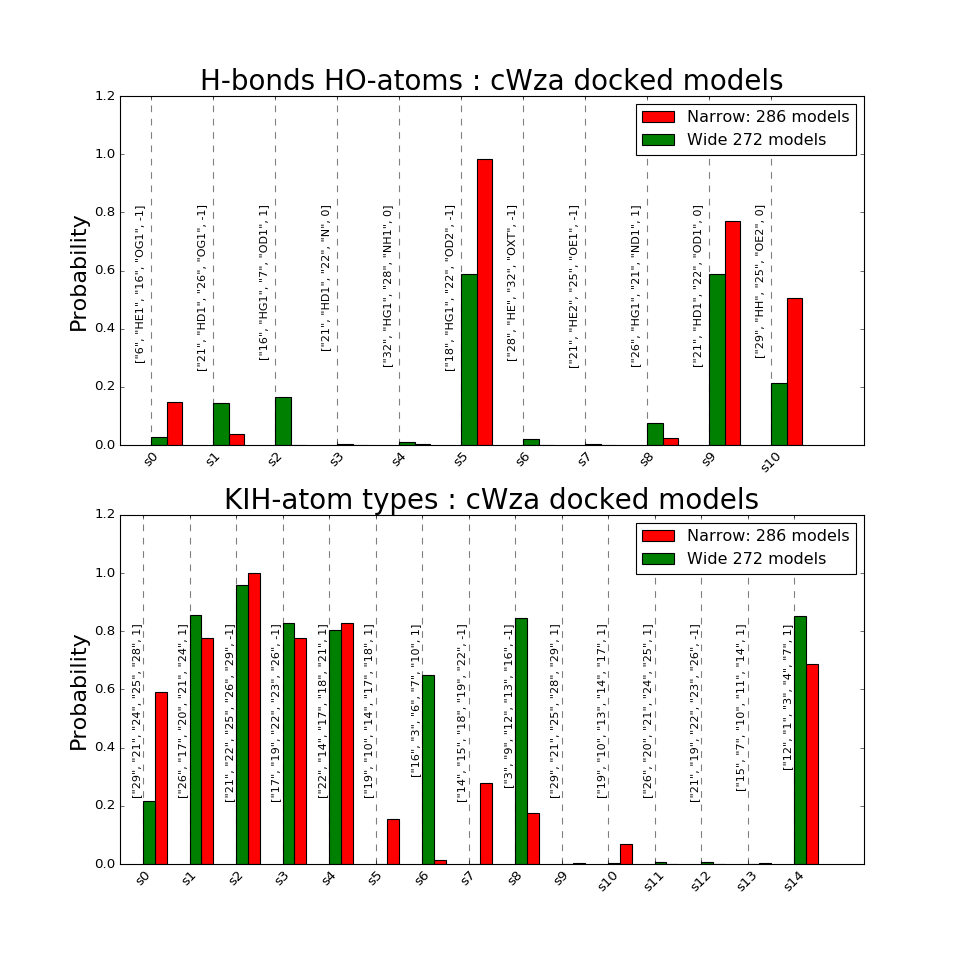

In [959]:
fig_hb_sample, ax = plt.subplots(2,1,figsize=(12,12))
################################################################
S = S_hbonds_sample

X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(Hbonds_stats_sample["narrow"].keys()):
    x = Hbonds_stats_sample["narrow"][pdb]
    X = X + numpy.asarray(x)
    N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(Hbonds_stats_sample["wide"].keys()):
    x = Hbonds_stats_sample["wide"][pdb]
    Y = Y + numpy.asarray(x)
    N_wide += 1
        
ax[0].bar(numpy.arange(len(S))+0.25,X/float(N_narrow),color="red",width=0.25,label="Narrow: "+str(N_narrow)+" models")
ax[0].bar(numpy.arange(len(S)),Y/float(N_wide),color="green",width=0.25,label="Wide "+str(N_wide)+" models")

ax[0].set_xlim(-0.5,len(S)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S))],rotation=45)
for i in range(len(S)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S)):
    ax[0].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[0].set_title("H-bonds HO-atoms : cWza docked models",fontsize=25)
ax[0].legend(loc='best')
################################################################
S = S_kihs_sample

X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(KIHs_stats_sample["narrow"].keys()):
    x = KIHs_stats_sample["narrow"][pdb]
    X = X + numpy.asarray(x)
    N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(KIHs_stats_sample["wide"].keys()):
    x = KIHs_stats_sample["wide"][pdb]
    Y = Y + numpy.asarray(x)
    N_wide += 1

ax[1].bar(numpy.arange(len(S))+0.25,X/float(N_narrow),color="red",width=0.25,label="Narrow: "+str(N_narrow)+" models")
ax[1].bar(numpy.arange(len(S)),Y/float(N_wide),color="green",width=0.25,label="Wide "+str(N_wide)+" models")

ax[1].set_xlim(-0.5,len(S)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xticks(range(len(S)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S))],rotation=45)
for i in range(len(S)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S)):
    ax[1].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[1].set_title("KIH-atom types : cWza docked models",fontsize=25)
ax[1].legend(loc='best')

plt.show()

TO-DO:
* Perform EM for remaining models 
* Order base interactions to visualise better in plots
* Talk to Ali/Prasun/Sesh about results


**Identify remaining narrow/wide models**

Models analysed so far

In [974]:
path0="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

pdbs_initial = {}
for model_type in ['narrow','wide']:
    out = !ls {path0}/{model_type}/input
    pdbs_initial[model_type] = out

All narrow and wide models

In [985]:
pdbs_all = {}
for model_type in ['narrow','wide']:
    if model_type == 'narrow':
        pdb_modeln = models_narrow_bb
        pdbs_all[model_type] = []
    elif model_type == 'wide':
        pdb_modeln = models_wide_bb
        pdbs_all[model_type] = []
    for nmodel in pdb_modeln:
        pdbs_all[model_type].append("refined1_0001_INPUT_"+nmodel+"_ignorechain.pdb")

*Models remianig*

In [986]:
pdbs_remaining = {}
for model_type in ['narrow','wide']:
    S = list(set(pdbs_all[model_type]).difference(set(pdbs_initial[model_type])))
    pdbs_remaining[model_type] = S

Copy models to respective directories. Copied PDBs already have renumbered amino acids (1-32)

*Double check PDBs are separate sets for narrow and wide models*

In [1022]:
path0="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"

ss = []
for model_type in ['narrow','wide']:
    out = !ls {path0}/{model_type}/input
    ss.append(out) 

In [1024]:
set(ss[0]).intersection(ss[1])

set()

Save lists of remaining PDBs in text files

In [1035]:
for model_type in ['narrow','wide']:
    outfile = open(path0+'/'+model_type+'_remaining_pdbs.txt','w')
    for pdb in pdbs_remaining[model_type]:
        outfile.write(pdb+"\n")
    outfile.close()

### Embedding and EM of all models; including remaining ones

#### 1. Extract all post-EM protein PDBs

In [1054]:
# Working directory path
path0="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
import os
counter = 0
for group in ['narrow','wide']:
    # Define list of model numbers per group
    if group == 'narrow':
        models_bb = models_narrow_bb
    elif group == 'wide':
        models_bb = models_wide_bb
    for modeln in models_bb:
        pdbname = 'refined1_0001_INPUT_'+str(modeln)+'_ignorechain'
        gro_path = path0+'/'+group+'/output/'+pdbname+'/complex/em/em_No-PR_Ubonds.gro'
        if not os.path.isfile(gro_path):
            print(group, pdbname)
            counter += 1
print("%s models couldn't be energy minimized."%counter)

narrow refined1_0001_INPUT_0132_ignorechain
narrow refined1_0001_INPUT_0160_ignorechain
narrow refined1_0001_INPUT_0306_ignorechain
narrow refined1_0001_INPUT_0539_ignorechain
narrow refined1_0001_INPUT_0573_ignorechain
narrow refined1_0001_INPUT_0597_ignorechain
narrow refined1_0001_INPUT_0662_ignorechain
wide refined1_0001_INPUT_0159_ignorechain
wide refined1_0001_INPUT_0322_ignorechain
wide refined1_0001_INPUT_0633_ignorechain
10 models couldn't be energy minimized.


Practically all of the models above that couldn't be energy minimized actually correspond to models that could not be embedded in the first place. 

```bash
check4files confout.gro

confout.gro doesn't exist for refined1_0001_INPUT_0160_ignorechain.pdb : group narrow
confout.gro doesn't exist for refined1_0001_INPUT_0306_ignorechain.pdb : group narrow
confout.gro doesn't exist for refined1_0001_INPUT_0573_ignorechain.pdb : group narrow
confout.gro doesn't exist for refined1_0001_INPUT_0597_ignorechain.pdb : group narrow
confout.gro doesn't exist for refined1_0001_INPUT_0662_ignorechain.pdb : group narrow
confout.gro doesn't exist for refined1_0001_INPUT_0322_ignorechain.pdb : group wide
confout.gro doesn't exist for refined1_0001_INPUT_0633_ignorechain.pdb : group wide
7 confout.gro files were not found. See above
```

Extract protein structures for EM models

In [1059]:
# Working directory path

import os
counter = 0
for group in ['narrow','wide']:
    # Define list of model numbers per group
    if group == 'narrow':
        models_bb = models_narrow_bb
    elif group == 'wide':
        models_bb = models_wide_bb
    for modeln in models_bb:
        pdbname = 'refined1_0001_INPUT_'+str(modeln)+'_ignorechain'
        gro_path = path0+'/'+group+'/output/'+pdbname+'/complex/em/em_No-PR_Ubonds'
        if os.path.isfile(gro_path+'.gro') and not os.path.isfile(gro_path+'_Protein.pdb'):
            #print(group, pdbname)
            counter += 1
print("%s Post-EM protein structures have not been extracted."%counter)

narrow refined1_0001_INPUT_0005_ignorechain
narrow refined1_0001_INPUT_0006_ignorechain
narrow refined1_0001_INPUT_0016_ignorechain
narrow refined1_0001_INPUT_0020_ignorechain
narrow refined1_0001_INPUT_0021_ignorechain
narrow refined1_0001_INPUT_0022_ignorechain
narrow refined1_0001_INPUT_0023_ignorechain
narrow refined1_0001_INPUT_0024_ignorechain
narrow refined1_0001_INPUT_0028_ignorechain
narrow refined1_0001_INPUT_0030_ignorechain
narrow refined1_0001_INPUT_0034_ignorechain
narrow refined1_0001_INPUT_0039_ignorechain
narrow refined1_0001_INPUT_0044_ignorechain
narrow refined1_0001_INPUT_0048_ignorechain
narrow refined1_0001_INPUT_0049_ignorechain
narrow refined1_0001_INPUT_0059_ignorechain
narrow refined1_0001_INPUT_0060_ignorechain
narrow refined1_0001_INPUT_0072_ignorechain
narrow refined1_0001_INPUT_0074_ignorechain
narrow refined1_0001_INPUT_0075_ignorechain
narrow refined1_0001_INPUT_0083_ignorechain
narrow refined1_0001_INPUT_0084_ignorechain
narrow refined1_0001_INPUT_0087_

In [1061]:
# Extract of post-EM protein PDBs (No-PR, Unconstrained bonds)
path0="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
postEM_ppdbs = {}
for group in ['narrow','wide']:
    # Define list of model numbers per group
    if group == 'narrow':
        models_bb = models_narrow_bb
    elif group == 'wide':
        models_bb = models_wide_bb
    postEM_ppdbs[group] = {}
    for modeln in models_bb:
        pdbname = 'refined1_0001_INPUT_'+str(modeln)+'_ignorechain'
        ppdb_path = path0+'/'+group+'/output/'+pdbname+'/complex/em/em_No-PR_Ubonds_Protein.pdb'
        if os.path.isfile(ppdb_path):
            postEM_ppdbs[group][pdbname] = ppdb_path
        else:
            postEM_ppdbs[group][pdbname] = 'NoFile'

#### 2. Find all H-bonds and KIHs: original and post-EM models, for narrow and wide models

In [1070]:
from insert2db_interactions import get_OH_atoms
from insert2db_interactions import get_KIHs
from insert2db_interactions import interaction_direction
import json

In [1071]:
def find_interactions(pdb):
    hbonds_data = [json.loads(hb) for hb in get_OH_atoms(pdb)]
    pdb_hbonds = [json.dumps(hb[:-1]+[hb[-1]]) for hb in hbonds_data]
    # KIHs data
    kihs_data = [json.loads(kih) for kih in get_KIHs(pdb)]
    pdb_kihs = [json.dumps(kih[:-1]+[kih[-1]]) for kih in kihs_data]
    return pdb_hbonds, pdb_kihs

In [1080]:
path0="/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwza_NoWPN/3-analysis/md_relax/sem"
Hbonds_data = {}
KIHs_data = {}
for group in ["narrow", "wide"]:
    # Define pdbname space and paths to post-EM pdbs
    pdbnames = list(postEM_ppdbs[group].keys())
    Hbonds_data[group] = {}
    KIHs_data[group] = {}
    for pdb in pdbnames:
        Hbonds_data[group][pdb] = {}
        KIHs_data[group][pdb] = {}
        # Find interactions for originally docked model
        pdb_original = path0+"/"+group+"/input/"+pdb+".pdb"
        pdb_hbonds, pdb_kihs = find_interactions(pdb_original)
        # Find interactions for post-EM docked model
        pdb_postEM = postEM_ppdbs[group][pdb]
        if pdb_postEM != 'NoFile':
            hbonds_postEM, kihs_postEM = find_interactions(pdb_postEM)
            # Store data in dic
            Hbonds_data[group][pdb] = {"original":pdb_hbonds, "em":hbonds_postEM}
            KIHs_data[group][pdb] = {"original":pdb_kihs, "em":kihs_postEM}
        else:
            Hbonds_data[group][pdb] = {"original":pdb_hbonds, "em":"NoFile"}
            KIHs_data[group][pdb] = {"original":pdb_kihs, "em":"NoFile"}

In [1084]:
with open(path0+'/'+'Hbonds_Original_PostEM.json', 'w') as fp:
    json.dump(Hbonds_data, fp)

In [1083]:
with open(path0+'/'+'KIHs_Original_PostEM.json', 'w') as fp:
    json.dump(KIHs_data, fp)

<span style="color:red">MAKE DATABASE OF BB-RAD, HOLE G, HBONDS AND KIHS</span>

#### 3. Find base sets of OH-atom types and KIHs

Get all H-bonds and KIHs identities, then reduce by defining their direction in the assembly.

In [1085]:
S_hbonds = set()
for group in ["wide","narrow"]:
    for pdb in list(Hbonds_data[group].keys()):
        data0 = Hbonds_data[group][pdb]
        for type in ["original","em"]:
            data1 = data0[type]
            if data1 != "NoFile":
                S_hbonds = S_hbonds.union(set(data1))

In [1086]:
S_kihs = set()
for group in ["wide","narrow"]:
    for pdb in list(KIHs_data[group].keys()):
        data0 = KIHs_data[group][pdb]
        for type in ["original","em"]:
            data1 = data0[type]
            if data1 != "NoFile":
                S_kihs = S_kihs.union(set(data1))

In [1087]:
S_hbonds = set([json.dumps(x[:-1]+[interaction_direction(x[-1])]) for x in [json.loads(x) for x in list(S_hbonds)]])
S_kihs = set([json.dumps(x[:-1]+[interaction_direction(x[-1])]) for x in [json.loads(x) for x in list(S_kihs)]])

In [1102]:
S_hbonds_ordered = []
for resn in range(1,33):
    for hb in S_hbonds:
        x = json.loads(hb)
        if int(x[0]) == resn:
            S_hbonds_ordered.append(json.dumps(x))

In [1104]:
S_kihs_ordered = []
for resn in range(1,33):
    for kih in S_kihs:
        x = json.loads(kih)
        if int(x[0]) == resn:
            S_kihs_ordered.append(json.dumps(x))

In [1106]:
S_hbonds = S_hbonds_ordered
S_kihs = S_kihs_ordered

#### 4. Find average interaction multiplicity per conformation group

In [1107]:
Hbonds_stats = {}

for group in ["narrow","wide"]:
    pdbnames = list(postEM_ppdbs[group].keys())
    Hbonds_stats[group] = {}
    for pdb in pdbnames:
        Hbonds_stats[group][pdb] = {}
        hbonds_model = Hbonds_data[group][pdb]
        if hbonds_model["em"] != "NoFile":
            for model_type in ["original","em"]:
                shb_vector = []
                for shb in S_hbonds:
                    c = 0
                    for x in hbonds_model[model_type]:
                        hb_raw = json.loads(x)
                        hb = json.dumps(hb_raw[:-1]+[interaction_direction(hb_raw[-1])])
                        if hb == shb:
                            c+=1
                    shb_vector.append(c)
                Hbonds_stats[group][pdb][model_type] = shb_vector    
        else:
            for model_type in ["original","em"]:
                Hbonds_stats[group][pdb][model_type] = "NA"

<IPython.core.display.Javascript object>


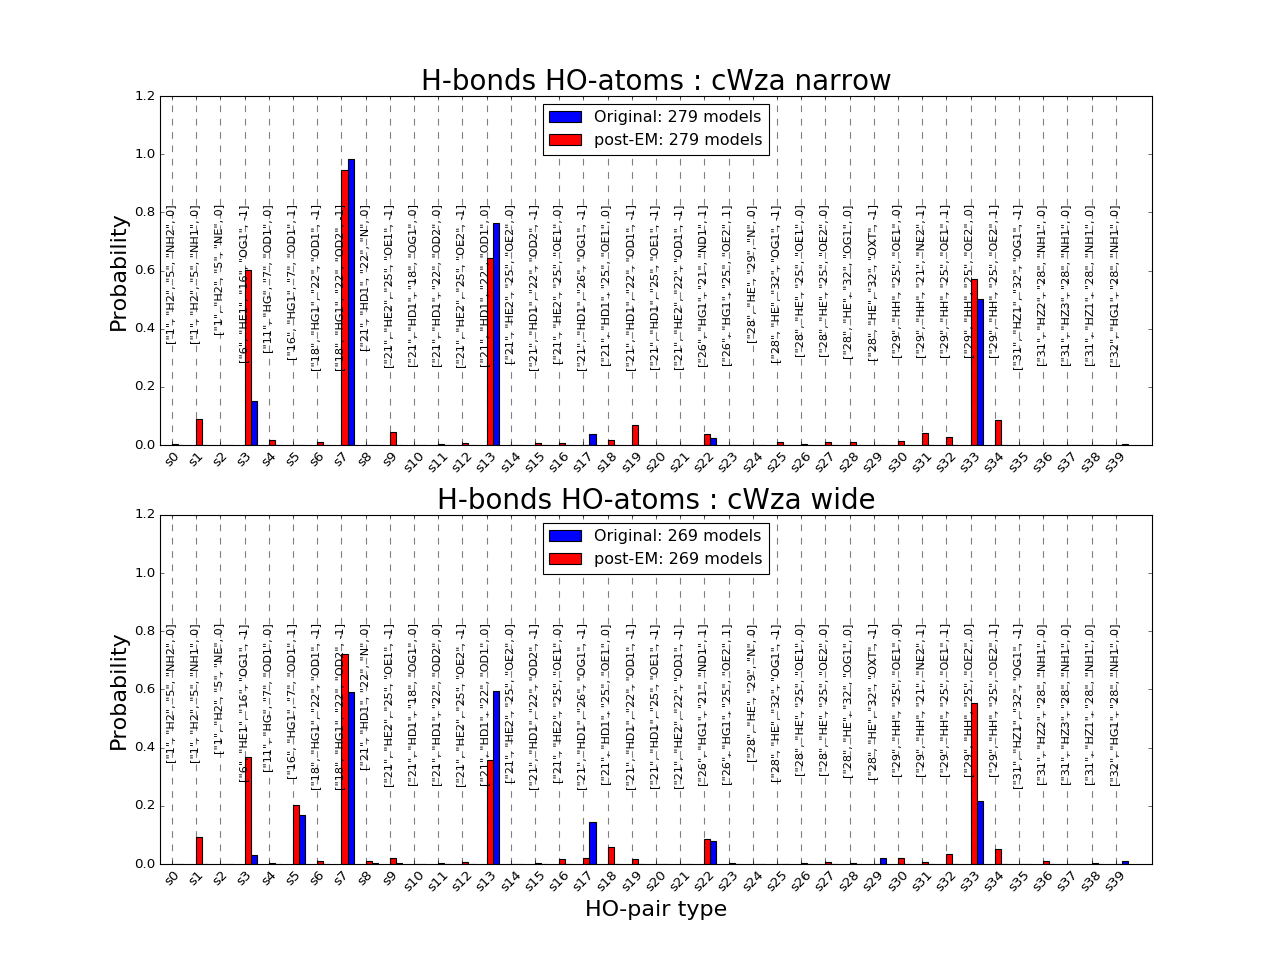

In [1113]:
fig_hb_new, ax = plt.subplots(2,1,figsize=(16,12))

################################################################
X = numpy.zeros(len(S_hbonds))
Y = numpy.zeros(len(S_hbonds))
N_models = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1

ax[0].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original: "+str(N_narrow)+" models")
ax[0].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_models),color="red",width=0.25,label="post-EM: "+str(N_narrow)+" models")

ax[0].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S_hbonds)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S_hbonds)):
    ax[0].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[0].set_title("H-bonds HO-atoms : cWza narrow",fontsize=25)
################################################################
X = numpy.zeros(len(S_hbonds))
Y = numpy.zeros(len(S_hbonds))
N_models = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1

ax[1].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original: "+str(N_wide)+" models")
ax[1].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_models),color="red",width=0.25,label="post-EM: "+str(N_wide)+" models")

ax[1].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xlabel("HO-pair type",fontsize=20)
ax[1].set_xticks(range(len(S_hbonds)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S_hbonds)):
    ax[1].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[1].set_title("H-bonds HO-atoms : cWza wide",fontsize=25)
################################################################

ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
plt.show()

<IPython.core.display.Javascript object>


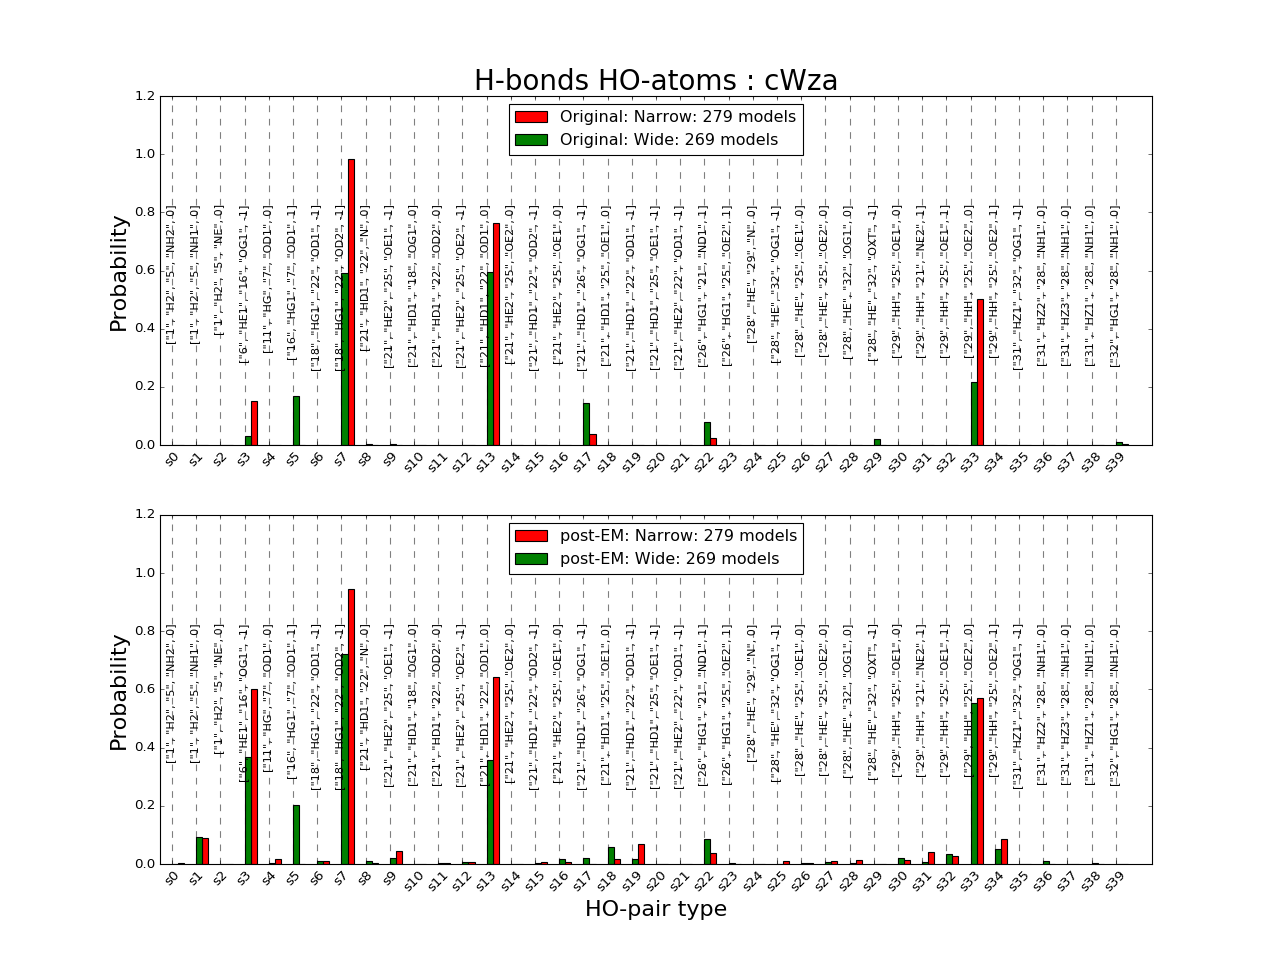

In [1112]:
fig_hb_comparison_new, ax = plt.subplots(2,1,figsize=(16,12))

################################################################
X = numpy.zeros(len(S_hbonds))
N_narrow = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        N_narrow += 1

Y = numpy.zeros(len(S_hbonds))
N_wide = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["original"])
        N_wide += 1
        
ax[0].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="Original: Narrow: "+str(N_narrow)+" models")
ax[0].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_wide),color="green",width=0.25,label="Original: Wide: "+str(N_wide)+" models")

ax[0].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S_hbonds)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)
    
for i in range(len(S_hbonds)):
    ax[0].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

ax[0].set_title("H-bonds HO-atoms : cWza",fontsize=25)
################################################################
X = numpy.zeros(len(S_hbonds))
N_narrow = 0
for pdb in list(Hbonds_stats["narrow"].keys()):
    x = Hbonds_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["em"])
        N_narrow += 1

Y = numpy.zeros(len(S_hbonds))
N_wide = 0
for pdb in list(Hbonds_stats["wide"].keys()):
    x = Hbonds_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["em"])
        N_wide += 1

ax[1].bar(numpy.arange(len(S_hbonds))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="post-EM: Narrow: "+str(N_narrow)+" models")
ax[1].bar(numpy.arange(len(S_hbonds)),Y/float(8*N_wide),color="green",width=0.25,label="post-EM: Wide: "+str(N_wide)+" models")

ax[1].set_xlim(-0.5,len(S_hbonds)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xlabel("HO-pair type",fontsize=20)
ax[1].set_xticks(range(len(S_hbonds)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_hbonds))],rotation=45)
for i in range(len(S_hbonds)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S_hbonds)):
    ax[1].text(i-0.25,0.8,list(S_hbonds)[i],fontsize=10,rotation=90)

################################################################

ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
plt.show()

KIHs

In [1096]:
KIHs_stats = {}

for group in ["narrow","wide"]:
    pdbnames = list(postEM_ppdbs[group].keys())
    KIHs_stats[group] = {}
    for pdb in pdbnames:
        KIHs_stats[group][pdb] = {}
        kihs_model = KIHs_data[group][pdb]
        if kihs_model["em"] != "NoFile":
            for model_type in ["original","em"]:
                skih_vector = []
                for skih in S_kihs:
                    c = 0
                    for x in kihs_model[model_type]:
                        kih_raw = json.loads(x)
                        kih = json.dumps(kih_raw[:-1]+[interaction_direction(kih_raw[-1])])
                        if kih == skih:
                            c+=1
                    skih_vector.append(c)
                KIHs_stats[group][pdb][model_type] = skih_vector    
        else:
            for model_type in ["original","em"]:
                KIHs_stats[group][pdb][model_type] = "NA"

<IPython.core.display.Javascript object>


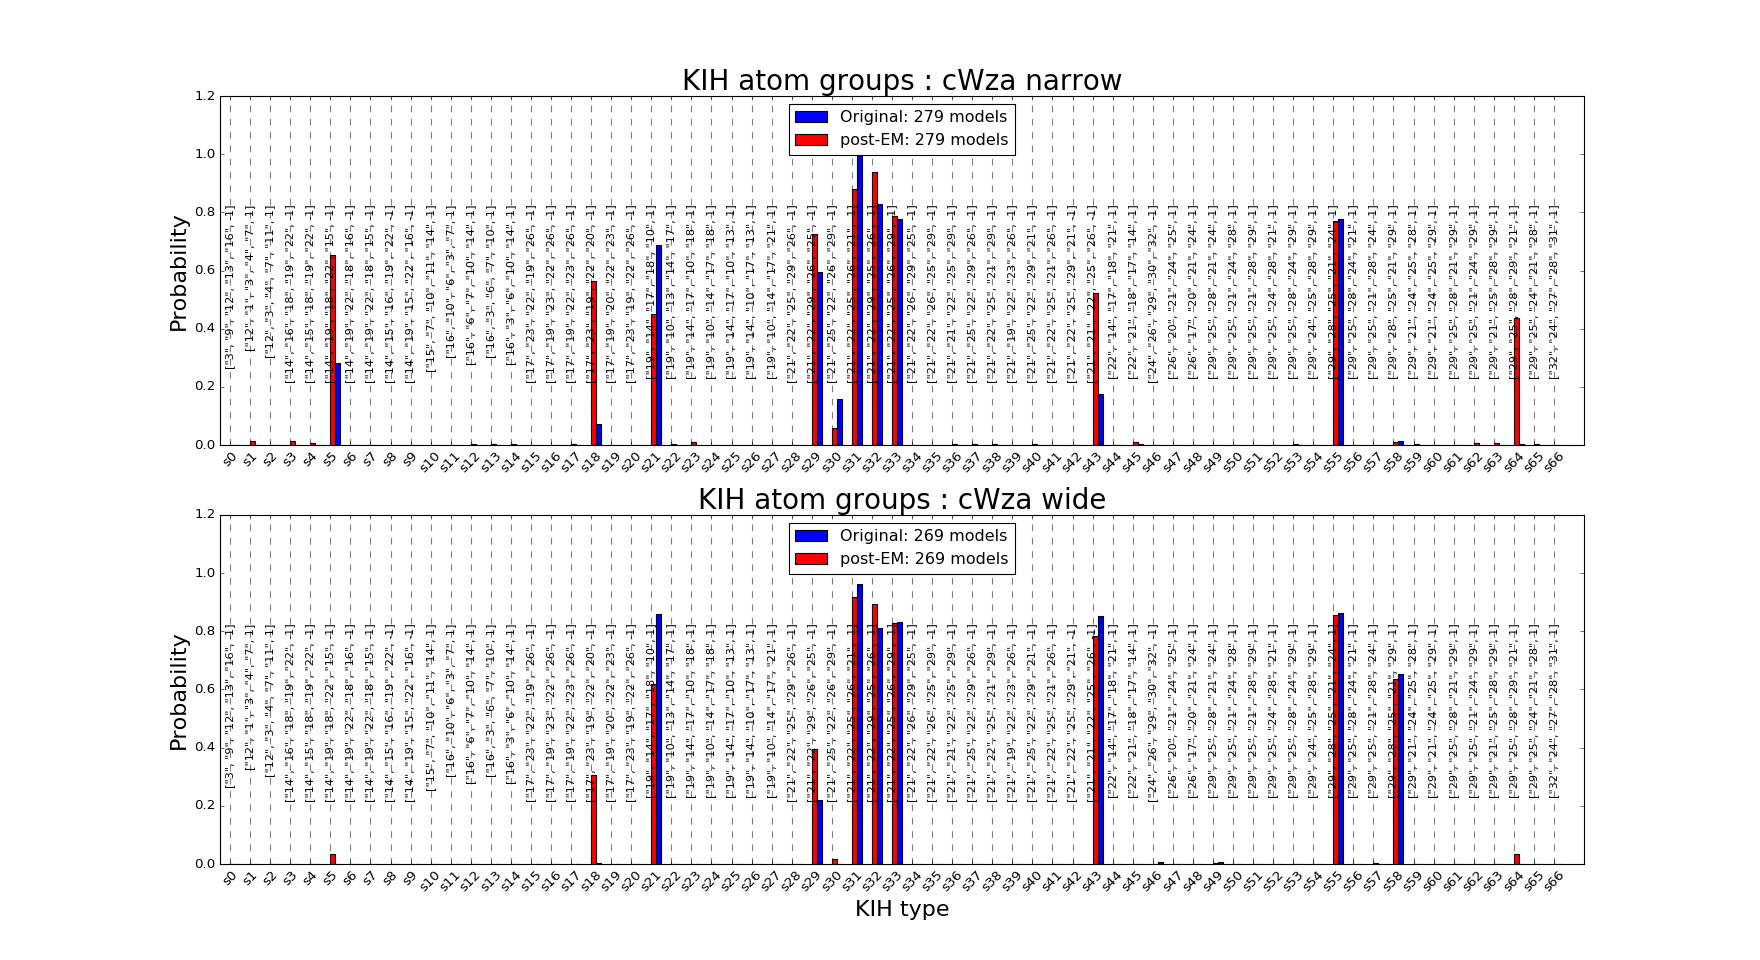

In [1117]:
fig_kih_original_new, ax = plt.subplots(2,1,figsize=(22,12))
################################################################
S = S_kihs
X = numpy.zeros(len(S))
Y = numpy.zeros(len(S))
N_models = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1
        
ax[0].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original: "+str(N_models)+" models")
ax[0].bar(numpy.arange(len(S)),Y/float(8*N_models),color="red",width=0.25,label="post-EM: "+str(N_models)+" models")

ax[0].set_xlim(-0.5,len(S)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S_kihs)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[0].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[0].set_title("KIH atom groups : cWza narrow",fontsize=25)
################################################################
X = numpy.zeros(len(S))
Y = numpy.zeros(len(S))
N_models = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        Y = Y + numpy.asarray(x["em"])
        N_models += 1
        
ax[1].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="blue",width=0.25,label="Original: "+str(N_models)+" models")
ax[1].bar(numpy.arange(len(S)),Y/float(8*N_models),color="red",width=0.25,label="post-EM: "+str(N_models)+" models")

ax[1].set_xlim(-0.5,len(S)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xlabel("KIH type",fontsize=20)
ax[1].set_xticks(range(len(S_kihs)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[1].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[1].set_title("KIH atom groups : cWza wide",fontsize=25)
################################################################

ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
plt.show()

<IPython.core.display.Javascript object>


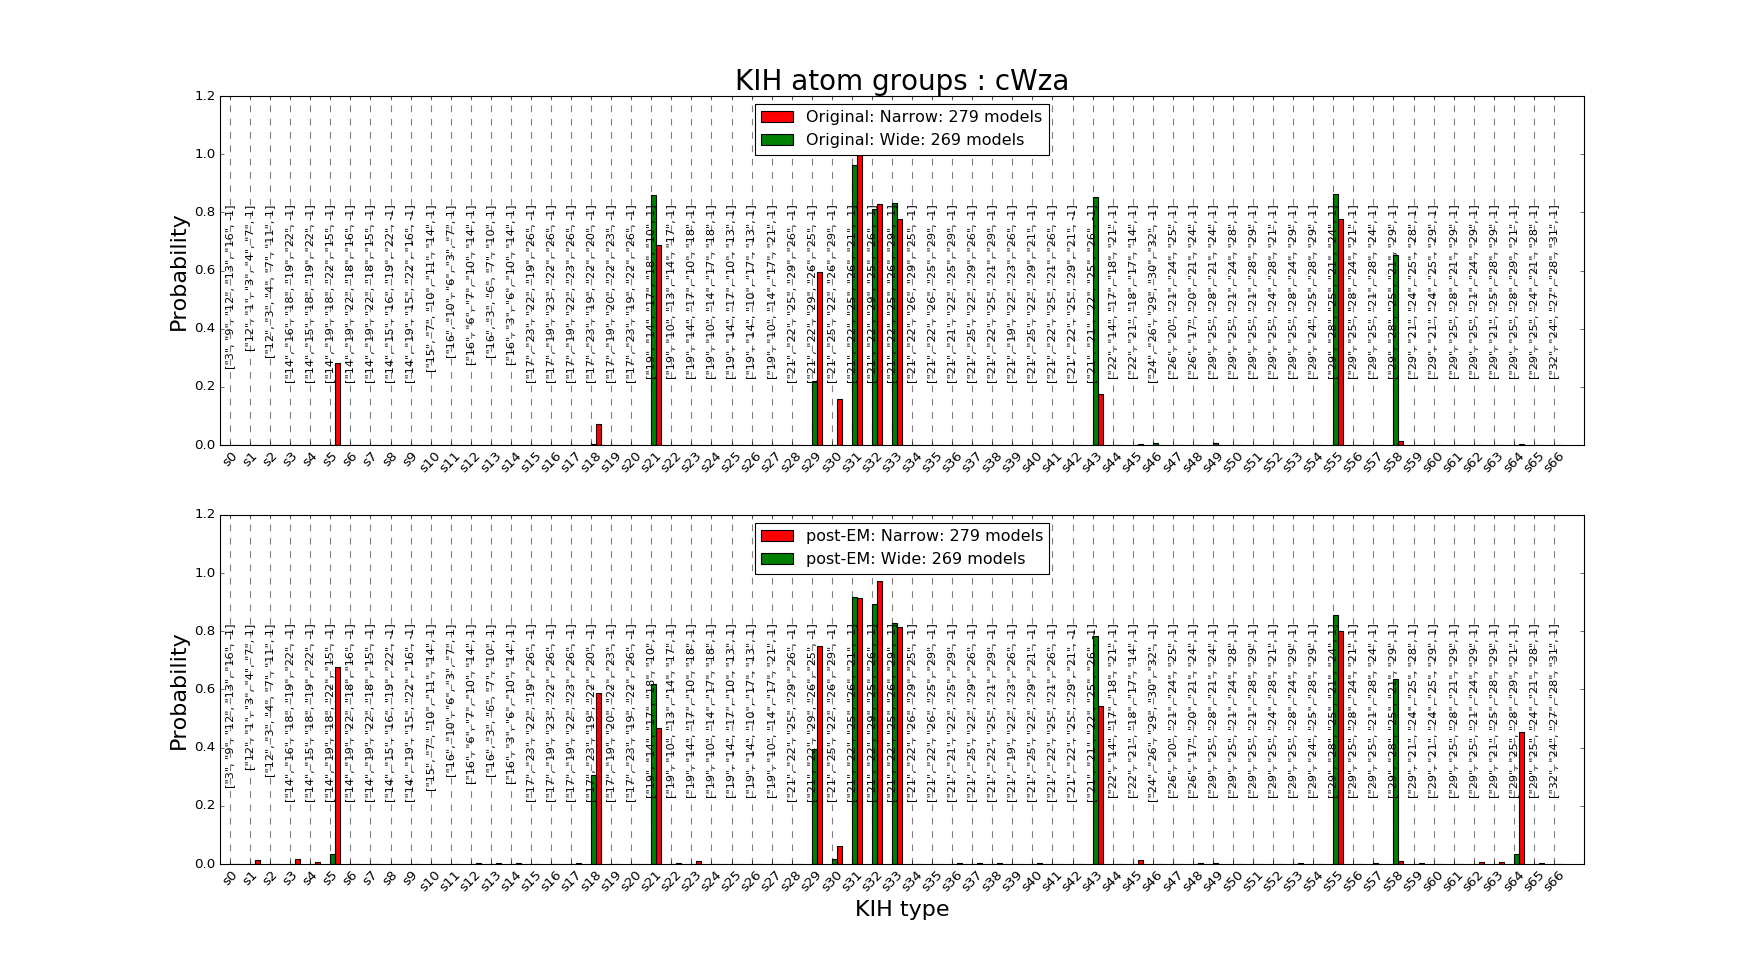

In [1119]:
fig_kih_original_new, ax = plt.subplots(2,1,figsize=(22,12))
################################################################
S = S_kihs
X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["original"])
        N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["original"])
        N_wide += 1
        
ax[0].bar(numpy.arange(len(S))+0.25,X/float(8*N_narrow),color="red",width=0.25,label="Original: Narrow: "+str(N_narrow)+" models")
ax[0].bar(numpy.arange(len(S)),Y/float(8*N_wide),color="green",width=0.25,label="Original: Wide: "+str(N_wide)+" models")

ax[0].set_xlim(-0.5,len(S)+0.5)
ax[0].set_ylim(0,1.2)

ax[0].set_xticks(range(len(S_kihs)))
ax[0].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[0].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[0].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[0].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

ax[0].set_title("KIH atom groups : cWza",fontsize=25)
################################################################
X = numpy.zeros(len(S))
N_narrow = 0
for pdb in list(KIHs_stats["narrow"].keys()):
    x = KIHs_stats["narrow"][pdb]
    if x["em"]!="NA":
        X = X + numpy.asarray(x["em"])
        N_narrow += 1

Y = numpy.zeros(len(S))
N_wide = 0
for pdb in list(KIHs_stats["wide"].keys()):
    x = KIHs_stats["wide"][pdb]
    if x["em"]!="NA":
        Y = Y + numpy.asarray(x["em"])
        N_wide += 1
        
ax[1].bar(numpy.arange(len(S))+0.25,X/float(8*N_models),color="red",width=0.25,label="post-EM: Narrow: "+str(N_narrow)+" models")
ax[1].bar(numpy.arange(len(S)),Y/float(8*N_models),color="green",width=0.25,label="post-EM: Wide: "+str(N_wide)+" models")

ax[1].set_xlim(-0.5,len(S)+0.5)
ax[1].set_ylim(0,1.2)

ax[1].set_xlabel("KIH type",fontsize=20)
ax[1].set_xticks(range(len(S_kihs)))
ax[1].set_xticklabels(["s"+str(i) for i in range(len(S_kihs))],rotation=45)
for i in range(len(S_kihs)):
    ax[1].plot((i,i),(0,1.2),color="black",linestyle="--",alpha=0.5)

ax[1].set_ylabel("Probability",fontsize=20)

for i in range(len(S)):
    ax[1].text(i-0.25,0.8,list(S)[i],fontsize=10,rotation=90)

################################################################

ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
plt.show()

**To-do's**

1. Take screenshots of structures showing key H-bonds and KIHs that differentiate narrow and wide groups

... Setup DB for analysis (Go through previous scripts)

2. Repeat analysis for cWzaK375C

3. Submit PRMD cWza sims (PR-SC+BB) for MD (100ns), GPU ... Determine times and resources needed for simulation and analysis.

3. Make slides explaining overall protocol for analysis. Clean Jupyter notebooks

4. Write functions for analysis and order libraries in common location (~/mpmodeling/protocol/analysis or tools)



In [ ]:
/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/cwzak375c_NoWPN/3-analysis

Check this RosettaMP feature:

```
 -relax:constrain_relax_to_start_coords    Add coordinate constraints to backbone heavy atoms, based on the input structure.
```